In [ ]:
Mohit MJ
231057001

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Gyroscope.csv')
g_mag = np.sqrt(df['Gyroscope x (rad/s)']**2 + df['Gyroscope y (rad/s)']**2 + df['Gyroscope z (rad/s)']**2)
df['Magnitude'] = g_mag
df

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Magnitude
0,0.038071,0.082225,-0.049500,0.032587,0.101357
1,0.040602,0.083187,-0.045238,0.029425,0.099159
2,0.043136,0.085387,-0.040013,0.027362,0.098187
3,0.045669,0.084288,-0.042075,0.026262,0.097798
4,0.048203,0.084288,-0.036850,0.024062,0.095086
...,...,...,...,...,...
48164,122.070466,3.503775,3.526737,1.756700,5.272600
48165,122.073000,3.475038,3.681012,1.796162,5.371400
48166,122.075534,3.437775,3.824700,1.838650,5.461434
48167,122.078067,3.396250,3.966187,1.879212,5.549468


In [ ]:
df[5136:5300]

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Magnitude
5136,13.050953,-4.971588,-10.702863,21.389225,24.428813
5137,13.053487,-5.859150,-9.812000,22.575850,25.303635
5138,13.056020,-6.631763,-8.526512,23.847588,26.179937
5139,13.058554,-7.307575,-6.787550,25.188488,27.091169
5140,13.061088,-7.912025,-4.505875,26.563351,28.080503
...,...,...,...,...,...
5295,13.453811,-1.092575,-5.150887,2.753850,5.942142
5296,13.456344,-1.011588,-5.167800,2.733638,5.933148
5297,13.458878,-0.937200,-5.172062,2.712462,5.914899
5298,13.461412,-0.868038,-5.166838,2.694313,5.891436


In [ ]:
from scipy.constants import g

In [ ]:
from matplotlib.legend import Shadow
# User-defined function for producing a component plot of a vector
def plotveccomp(x, name = ' ', axis = None, linewidth = 1, color = 'black', marker = ''):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, linewidth = linewidth, color = color, marker = marker)
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue',label='Mean')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red',label='Z-Score')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  plt.legend(framealpha=1, frameon=True,bbox_to_anchor=(1.0, 1.0))
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Gyroscope (rad/s)')
  ax1.set_title('Gyroscope data(X-axis)')
  ax2.set_title('Gyroscope data(Y-axis)')
  ax3.set_title('Gyroscope data(Z-axis)')

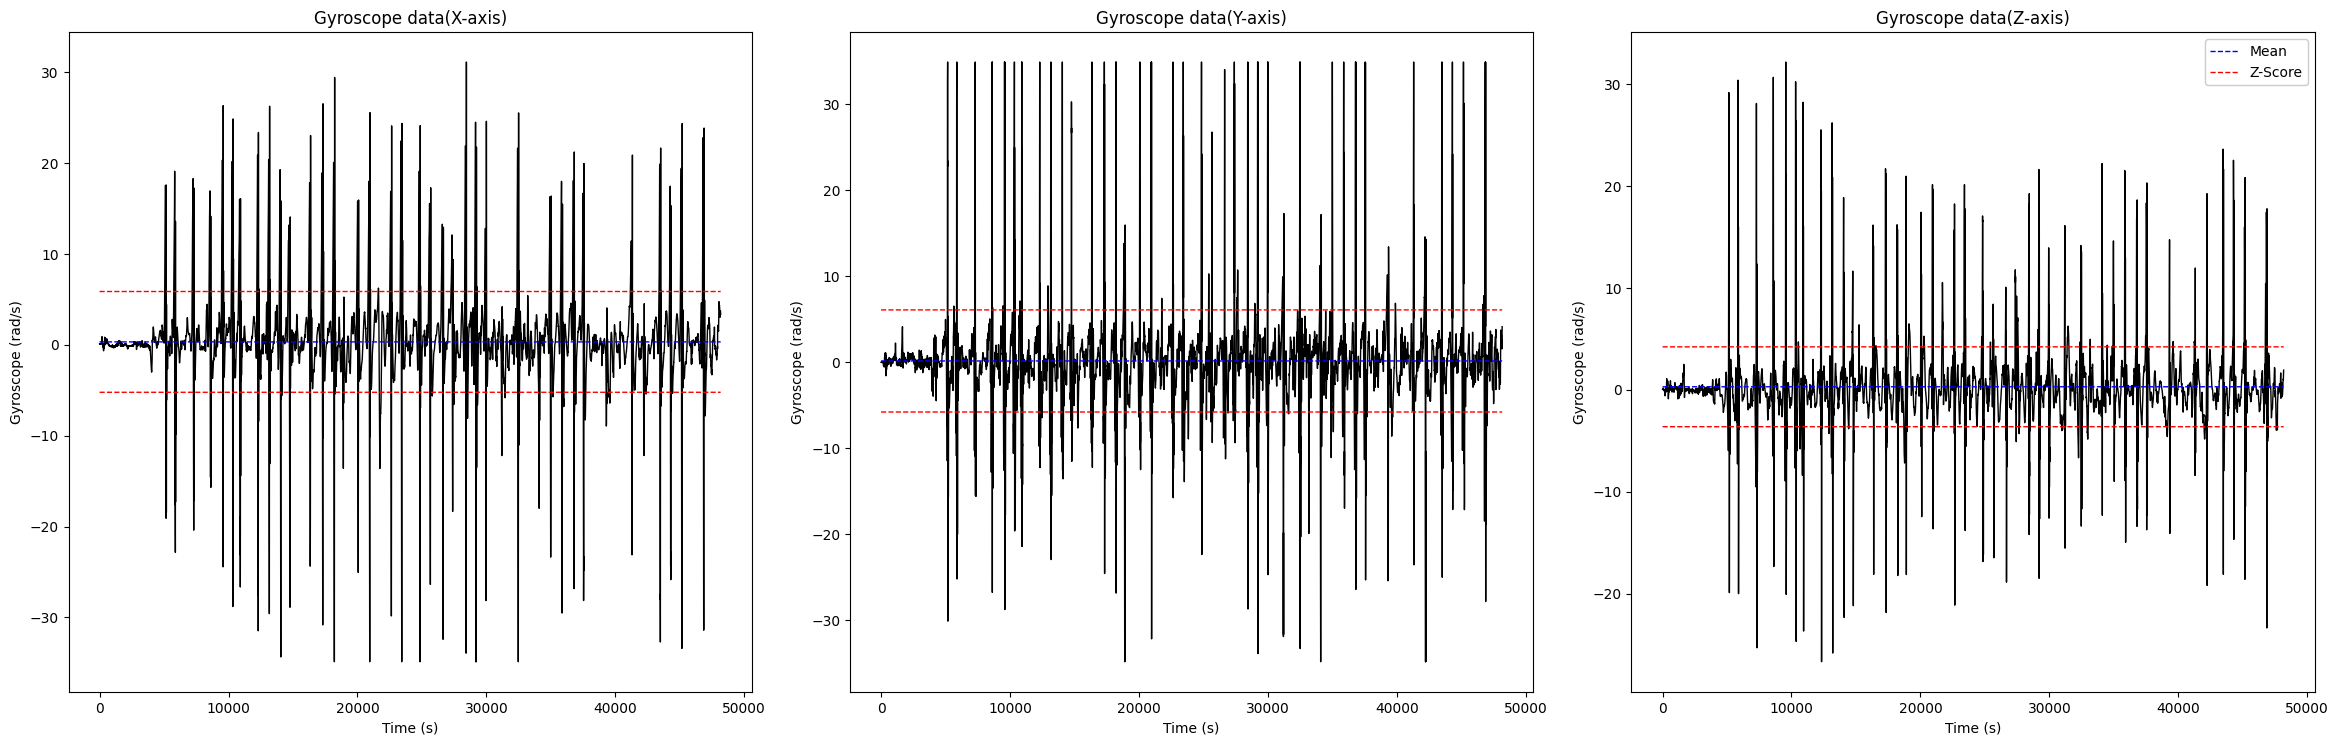

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (24,8))#24,5
fig.tight_layout(pad = 4.0)
plotveccomp(df['Gyroscope x (rad/s)'], 'Gyroscope x (rad/s)', ax1)
plotveccomp(df['Gyroscope y (rad/s)'], 'Gyroscope y (rad/s)', ax2)
plotveccomp(df['Gyroscope z (rad/s)'], 'Gyroscope z (rad/s)', ax3)
plt.savefig('stdofvec.png')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from numpy.lib.stride_tricks import sliding_window_view

In [ ]:
data = np.array(df['Gyroscope y (rad/s)'])
window_size = 10
scaler = StandardScaler()
y_std = scaler.fit_transform(data.reshape(-1, 1))
std_dev_windows = sliding_window_view(y_std, window_shape=(window_size,), axis=0).std(axis=-1)
print("Standard Deviation for Sliding Windows:")
print(std_dev_windows[4900:5050])
moving_average_windows = sliding_window_view(y_std, window_shape=(window_size,), axis=0).mean(axis=-1)
print("Moving Average for Sliding Windows:")
print(moving_average_windows[:5])


Standard Deviation for Sliding Windows:
[[0.02009962]
 [0.0215716 ]
 [0.02263838]
 [0.02280807]
 [0.02267712]
 [0.02233648]
 [0.02152303]
 [0.02003802]
 [0.01778336]
 [0.01488845]
 [0.0114765 ]
 [0.0087778 ]
 [0.0083165 ]
 [0.01011219]
 [0.0128401 ]
 [0.0152368 ]
 [0.01662975]
 [0.01702876]
 [0.01675415]
 [0.01580153]
 [0.01435502]
 [0.01269879]
 [0.01066958]
 [0.00843273]
 [0.00616504]
 [0.00455452]
 [0.00458734]
 [0.00640428]
 [0.00909432]
 [0.01172369]
 [0.01410474]
 [0.01630578]
 [0.01846192]
 [0.0209028 ]
 [0.02381519]
 [0.02734017]
 [0.03113551]
 [0.03493458]
 [0.03859359]
 [0.04160618]
 [0.04376747]
 [0.04527627]
 [0.04615095]
 [0.04632255]
 [0.04590673]
 [0.04492983]
 [0.04321923]
 [0.04035553]
 [0.03626555]
 [0.03086462]
 [0.02432722]
 [0.01772146]
 [0.01287961]
 [0.01291769]
 [0.01819558]
 [0.02600644]
 [0.03499923]
 [0.04445118]
 [0.05361105]
 [0.06171607]
 [0.06808335]
 [0.07165523]
 [0.07216138]
 [0.06941672]
 [0.06359978]
 [0.05547634]
 [0.04605419]
 [0.03622932]
 [0.0266

In [ ]:
threshold = 1.5
start = np.where(std_dev_windows >= threshold)[0][0]
start

5137

In [ ]:
data = np.array(df['Gyroscope y (rad/s)'])
window_size = 10
scaler = StandardScaler()
y_std = scaler.fit_transform(data.reshape(-1, 1))
std_dev_windows = sliding_window_view(y_std[-1+window_size:], window_shape=(window_size,), axis=0).std(axis=-1)

In [ ]:
end = len(y_std)-np.where(std_dev_windows >= threshold)[0][0]
end

43041

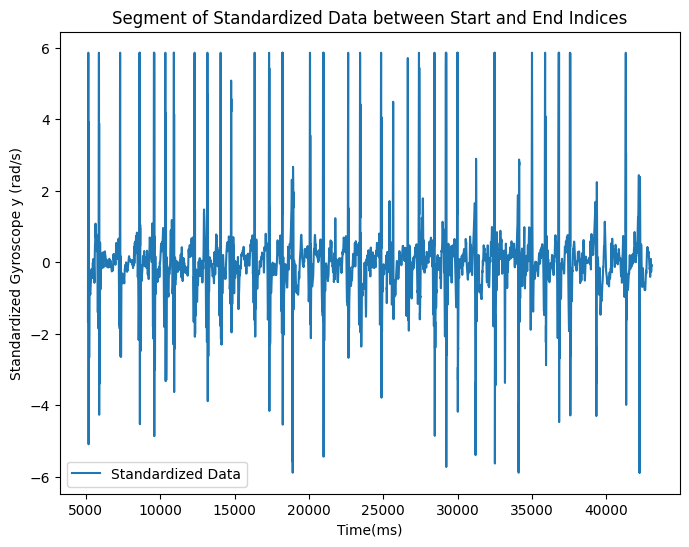

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the segment of 'Acceleration y (m/s^2)' data between start and end indices
ax.plot(np.arange(start, end), y_std[start:end], label='Standardized Data')
ax.set_xlabel('Time(ms)')
ax.set_ylabel('Standardized Gyroscope y (rad/s)')
ax.legend()
ax.set_title('Segment of Standardized Data between Start and End Indices')

# Show the plot
plt.show()

In [ ]:
# Slice the entire DataFrame between start_index and end_index
sliced_df = df.iloc[start:end]

# Print the sliced DataFrame
print("Sliced DataFrame:")
print(sliced_df)


Sliced DataFrame:
         Time (s)  Gyroscope x (rad/s)  Gyroscope y (rad/s)  \
5137    13.053487            -5.859150            -9.812000   
5138    13.056020            -6.631763            -8.526512   
5139    13.058554            -7.307575            -6.787550   
5140    13.061088            -7.912025            -4.505875   
5141    13.063622            -8.429162            -1.535738   
...           ...                  ...                  ...   
43036  109.077674             1.549900            -0.349113   
43037  109.080208             1.546737            -0.374687   
43038  109.082741             1.545637            -0.406588   
43039  109.085275             1.551000            -0.432162   
43040  109.087809             1.560625            -0.453337   

       Gyroscope z (rad/s)  Magnitude  
5137             22.575850  25.303635  
5138             23.847588  26.179937  
5139             25.188488  27.091169  
5140             26.563351  28.080503  
5141             27.85213

In [ ]:
sc = StandardScaler()

y = np.array(df['Gyroscope y (rad/s)']).reshape(-1, 1)

y_std = sc.fit_transform(y[0:5])
y_std
#print(y[0:200])

#np.std(y[])

array([[-1.55602717],
       [-0.57560363],
       [ 0.6262058 ],
       [ 0.15180736],
       [ 1.35361764]])

Text(0.5, 1.0, ' Magnitude')

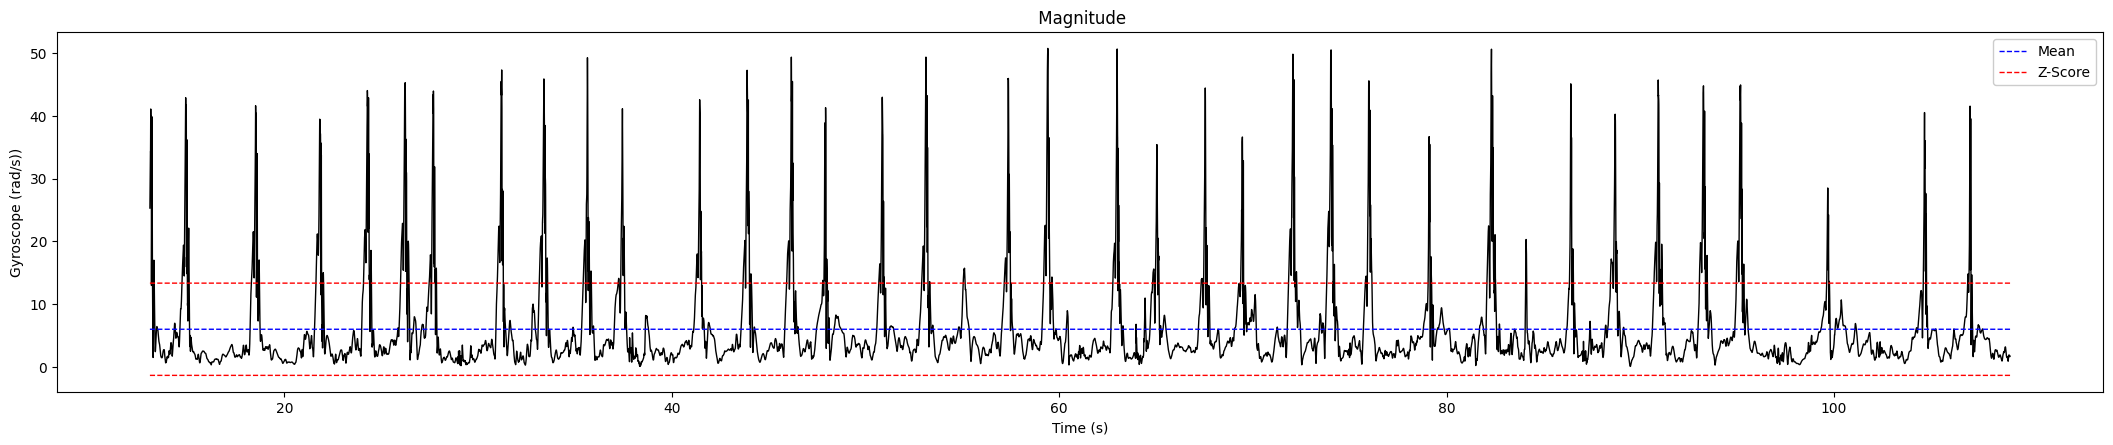

In [ ]:
a_mag = np.sqrt(sliced_df['Gyroscope x (rad/s)']**2 + sliced_df['Gyroscope y (rad/s)']**2 + sliced_df['Gyroscope z (rad/s)']**2)
t = sliced_df['Time (s)']
fig, ax = plt.subplots(1, 1, figsize = (22,5))
fig.tight_layout(pad = 4.0)
ax.plot(t, a_mag, linewidth = 1, color = 'black', marker = '')
ax.plot(t, [np.mean(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='blue',label='Mean')
ax.plot(t, [np.mean(a_mag) - np.std(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='red',label='Z-Score')
ax.plot(t, [np.mean(a_mag) + np.std(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='red')
plt.legend(framealpha=1, frameon=True,bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gyroscope (rad/s))')
ax.set_title(' Magnitude')

In [ ]:
#peak detection
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

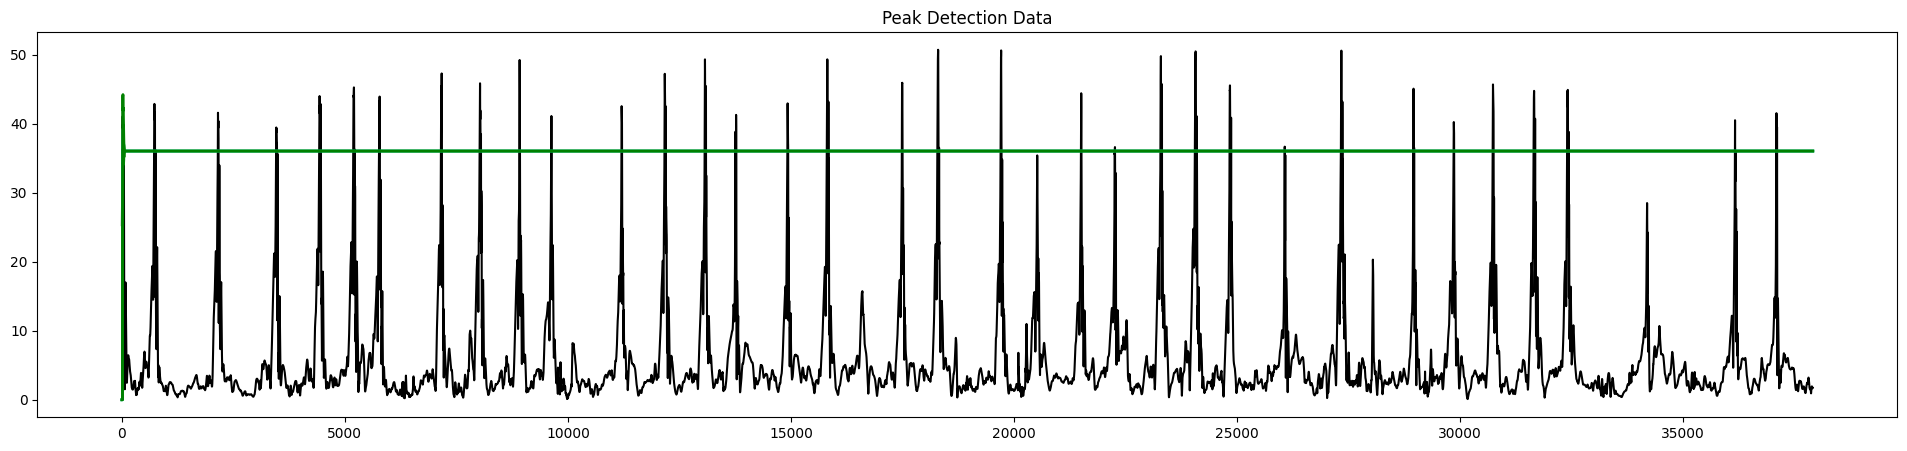

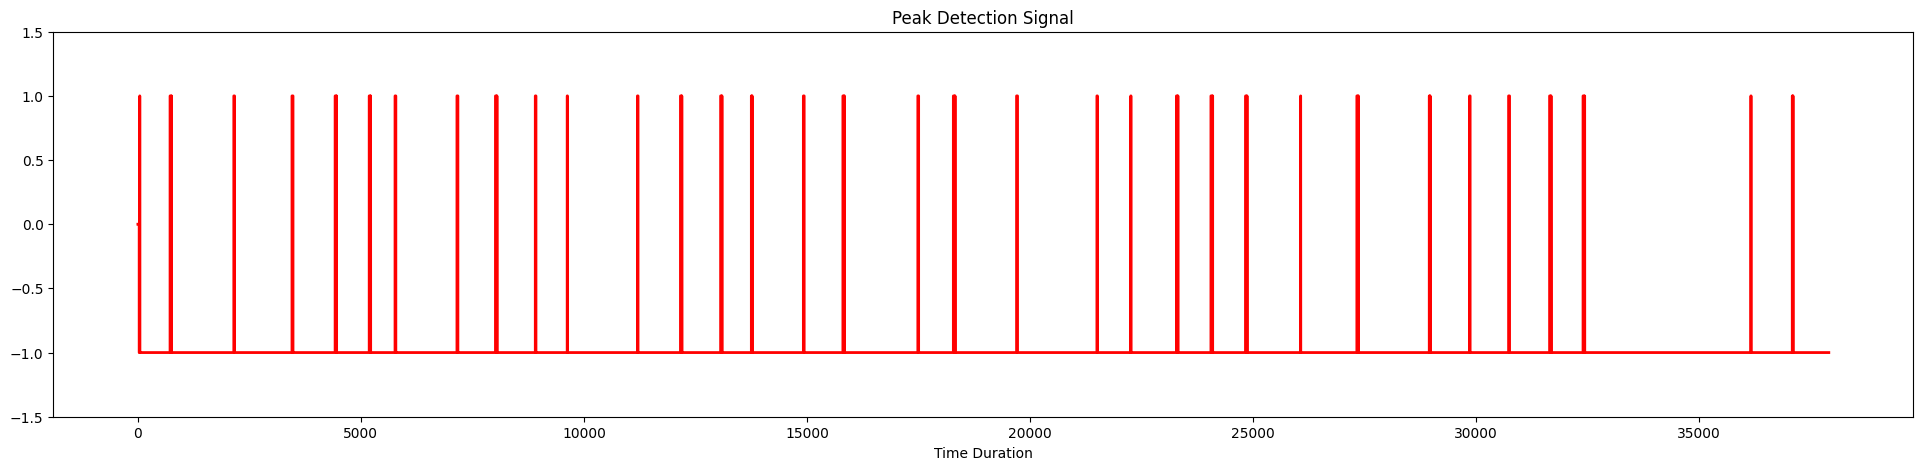

In [ ]:
# Data
y = np.array(a_mag)
#y = np.array([])

# Settings: lag = 30, threshold = 5, influence = 0 #5,3.5,0
lag =15
threshold =2.5
influence = 0

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result
fig, ax = plt.subplots(1,1, figsize = (24,5))
#pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y,color = 'black')

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y)+1),
          result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)
ax.set_title('Peak Detection Data')

fig, ax = plt.subplots(1,1, figsize = (24,5))
#pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
#plt.xlim(200 , 300)
pylab.ylim(-1.5,1.5)
ax.set_xlabel('Time Duration')
ax.set_title('Peak Detection Signal')#(1 second)
pylab.show()

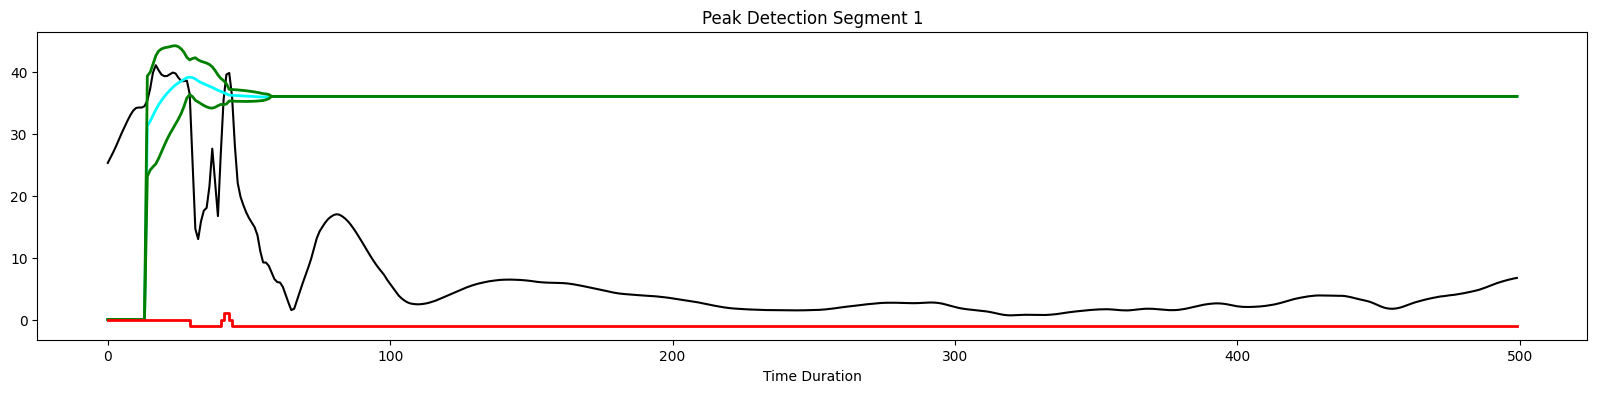

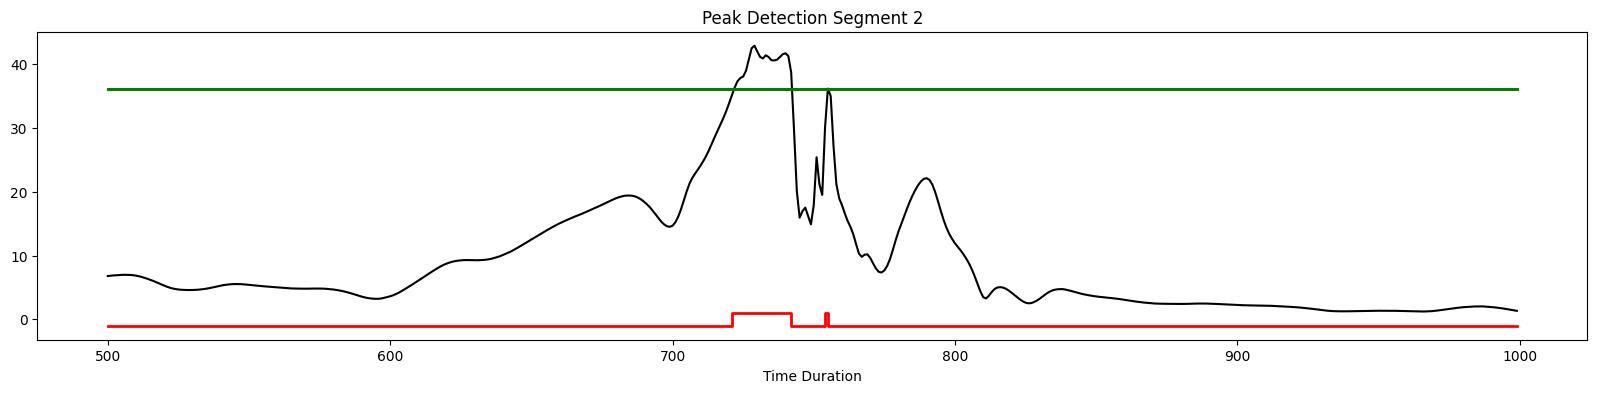

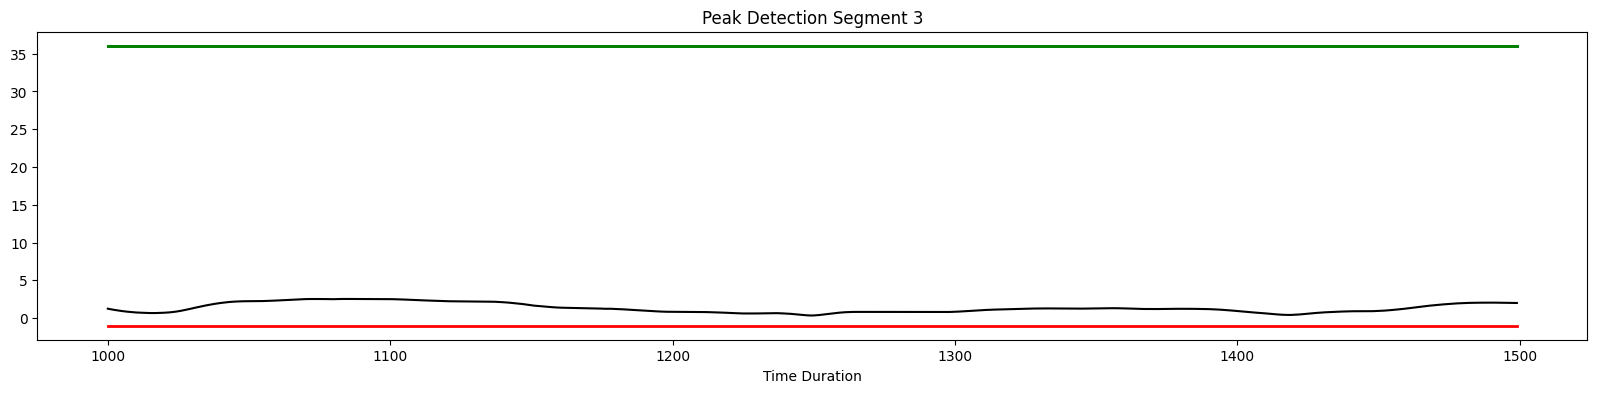

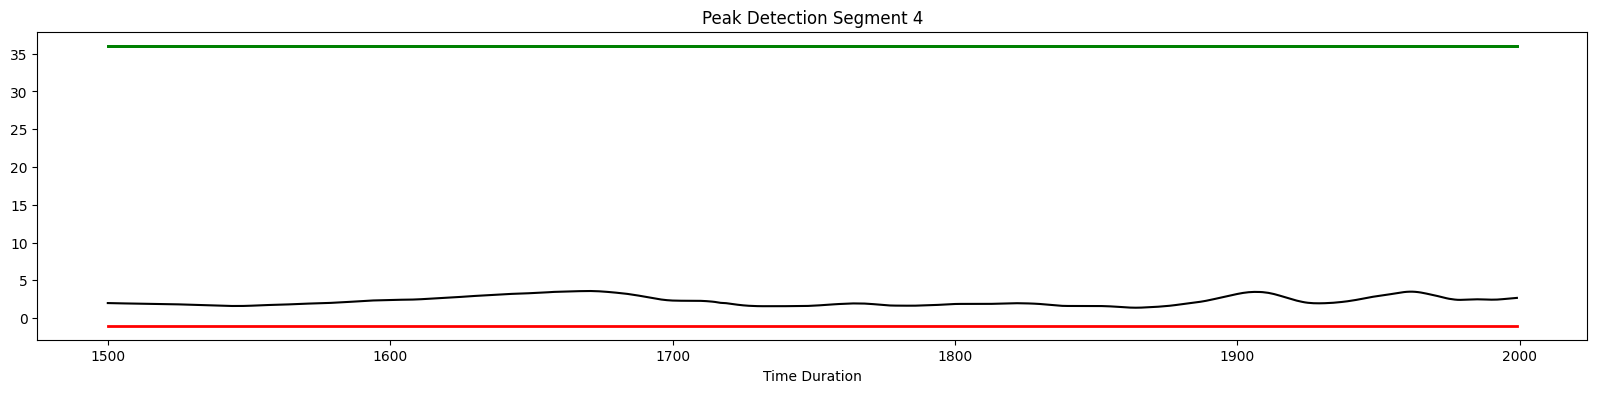

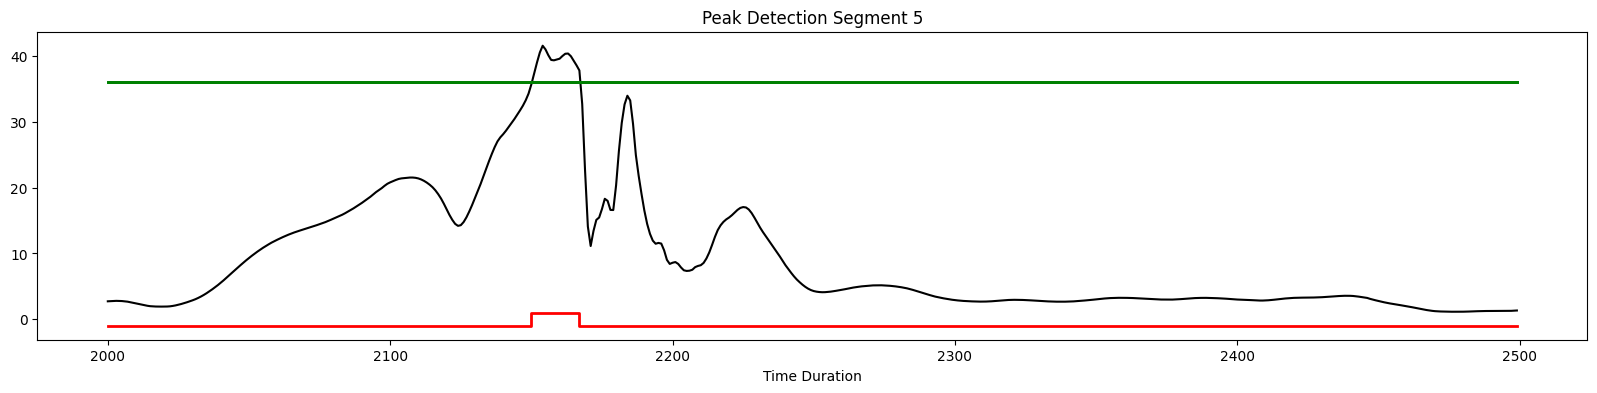

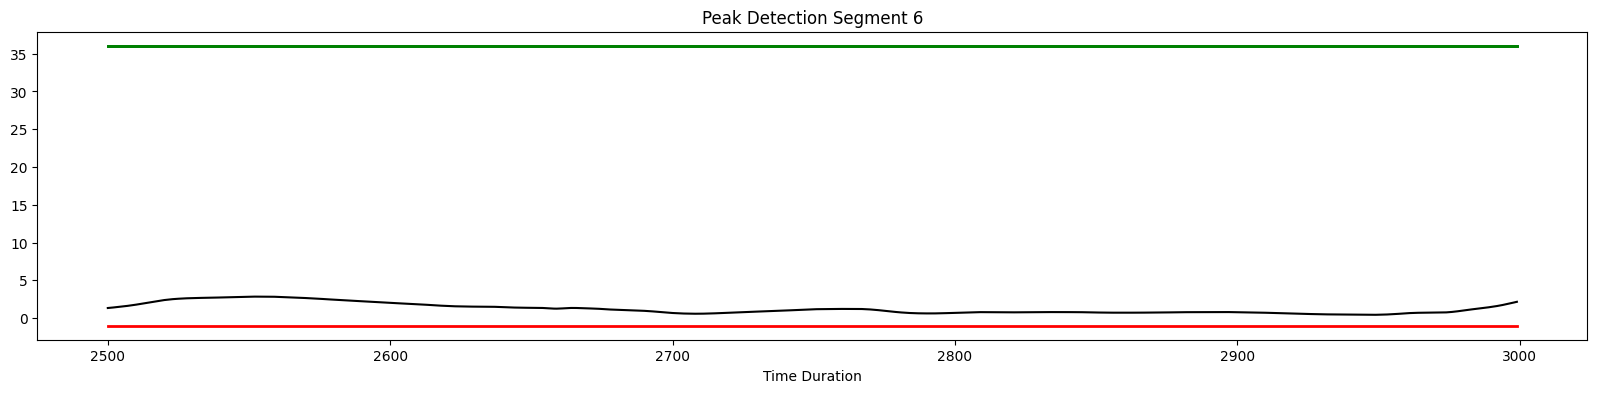

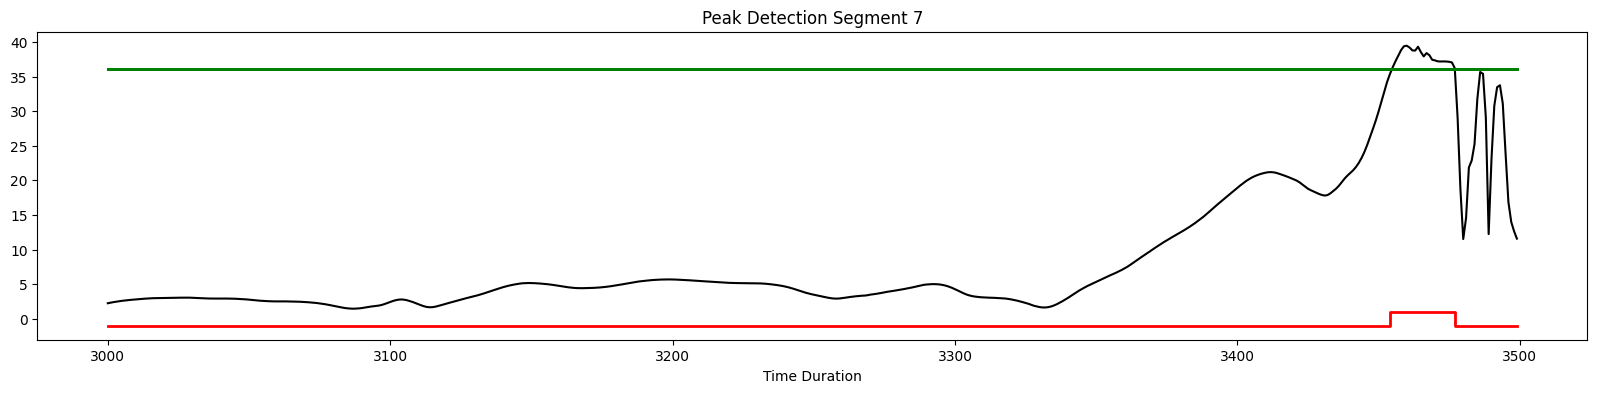

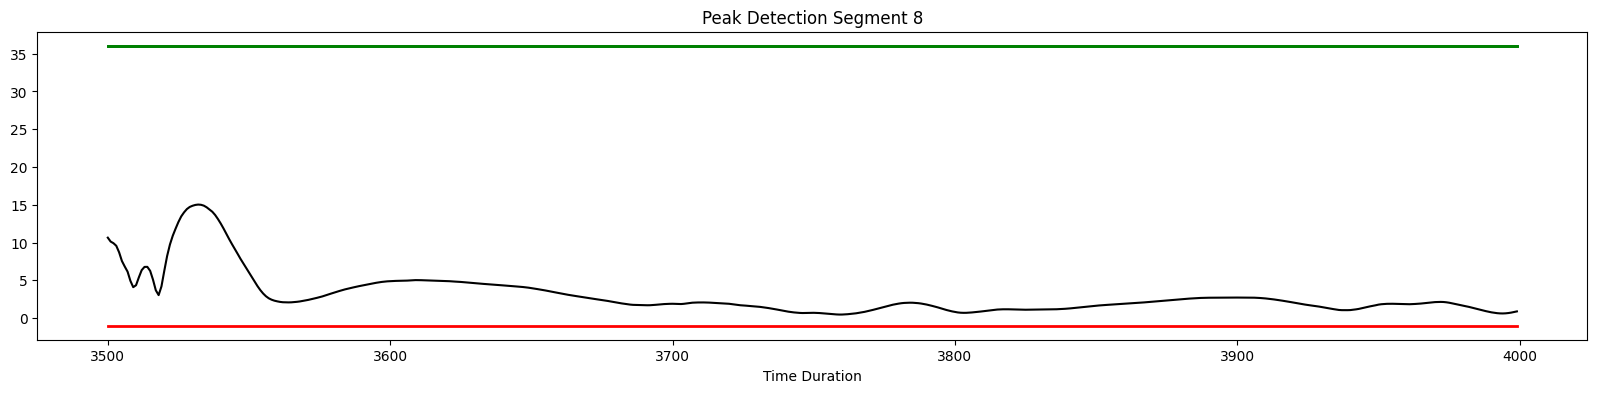

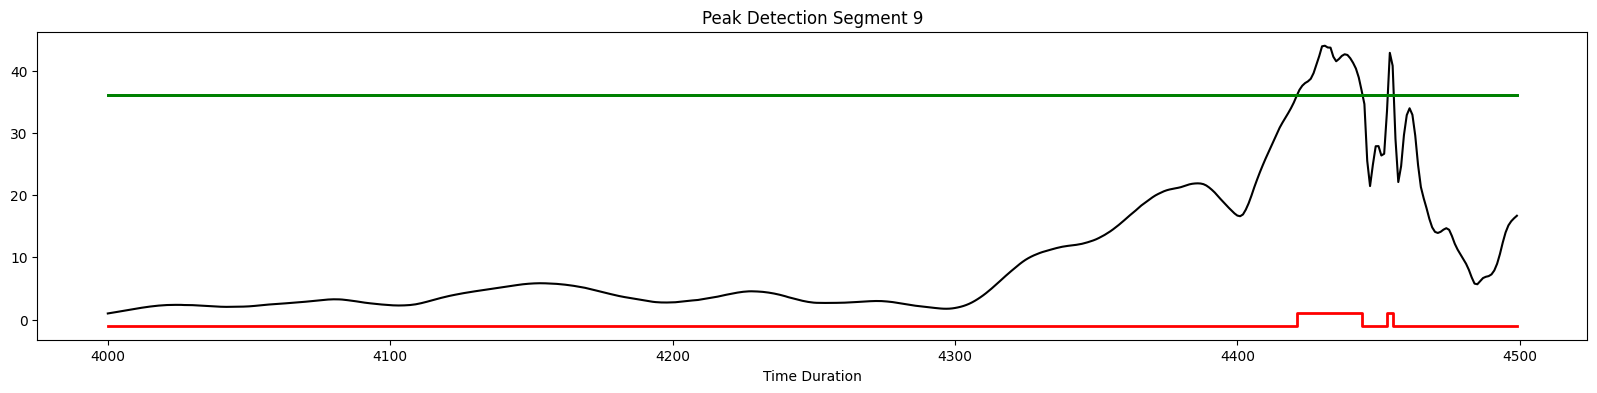

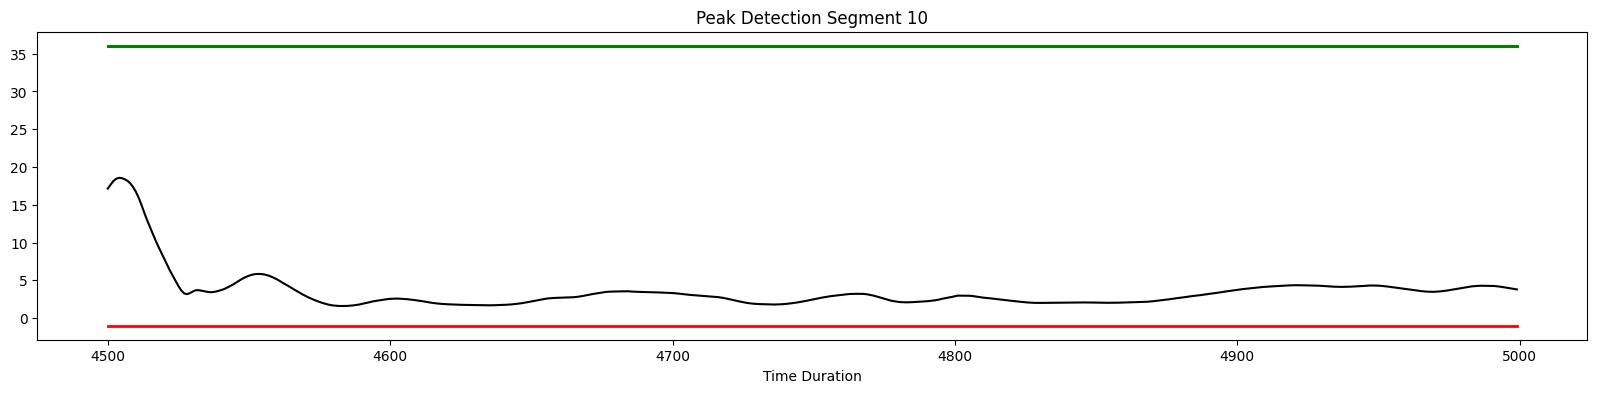

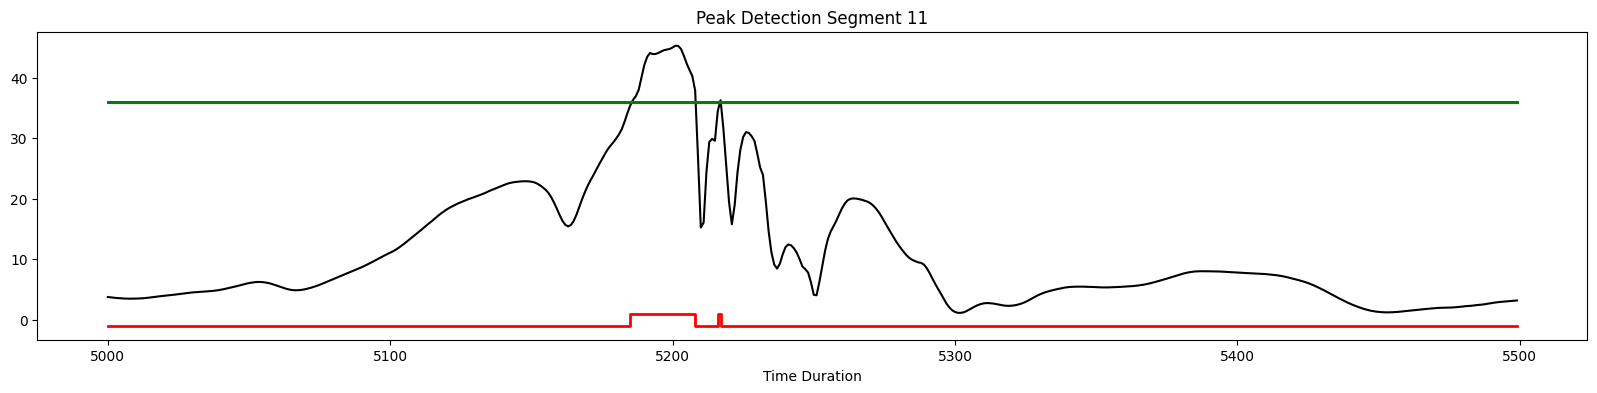

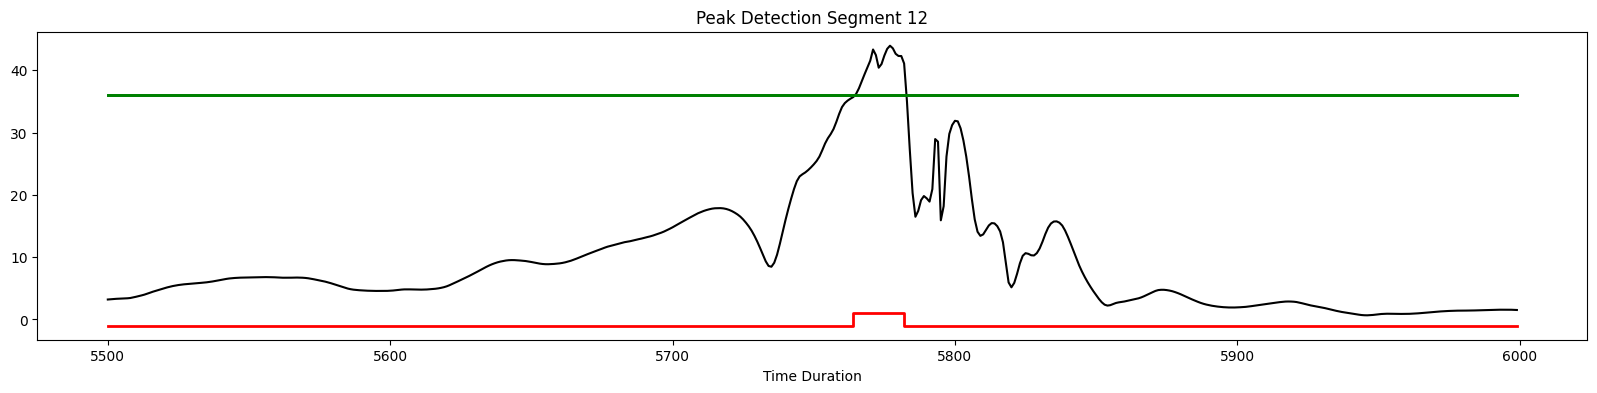

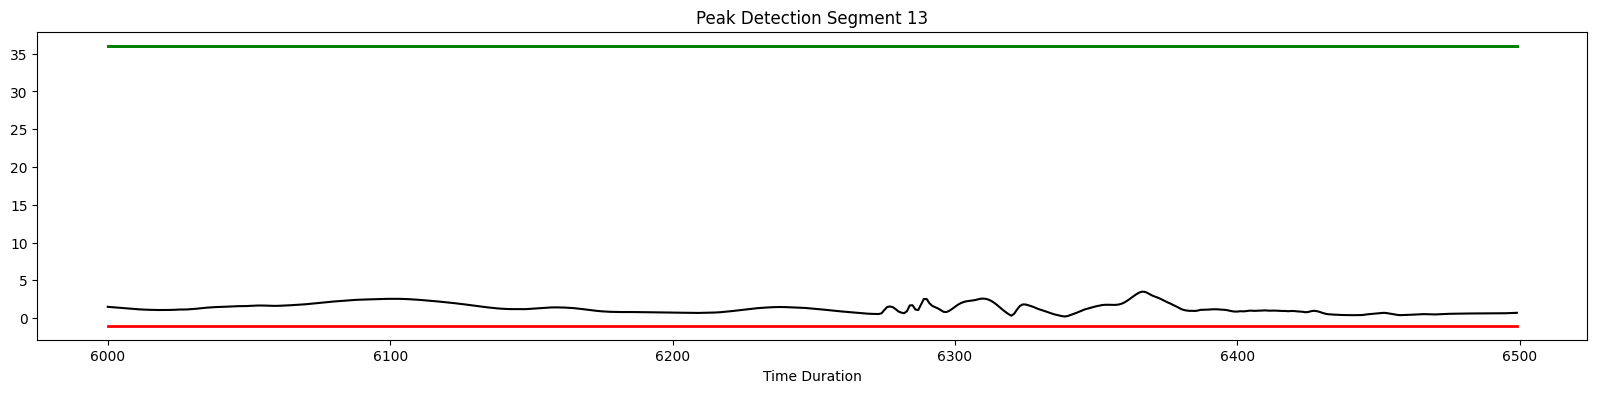

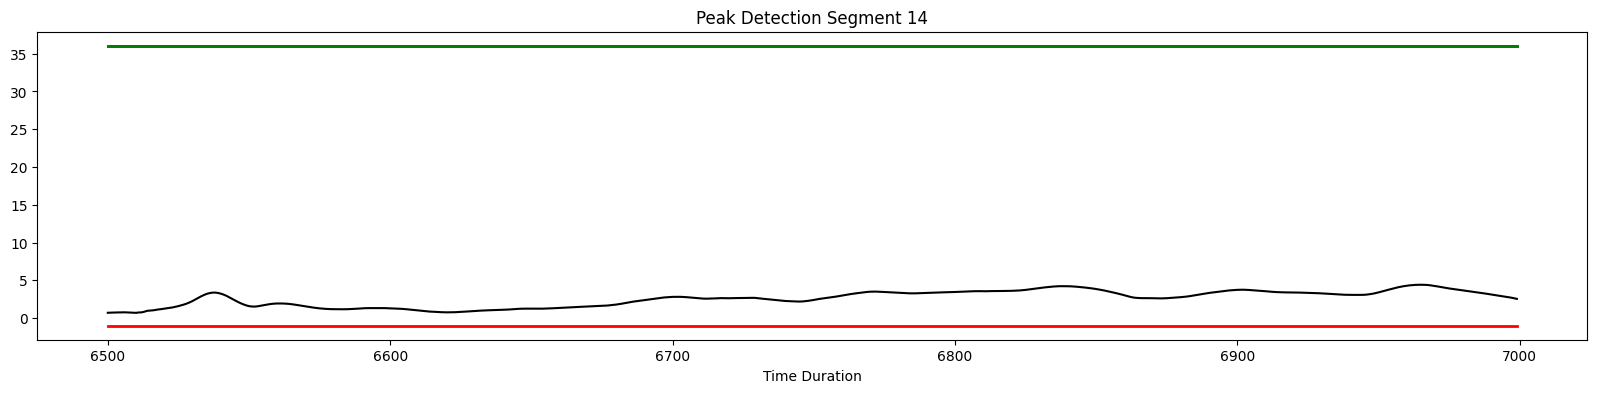

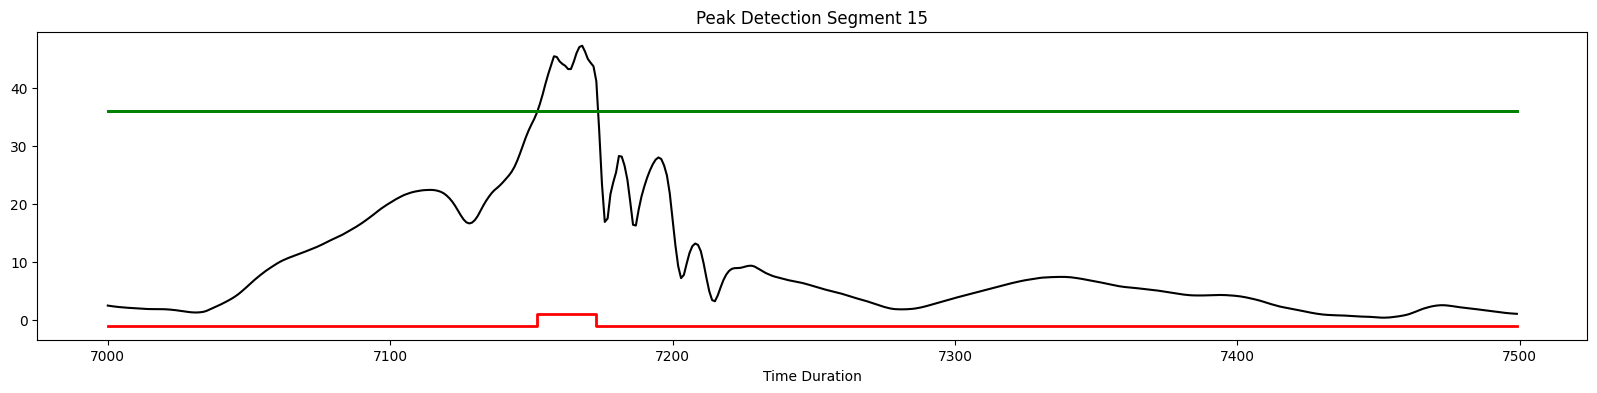

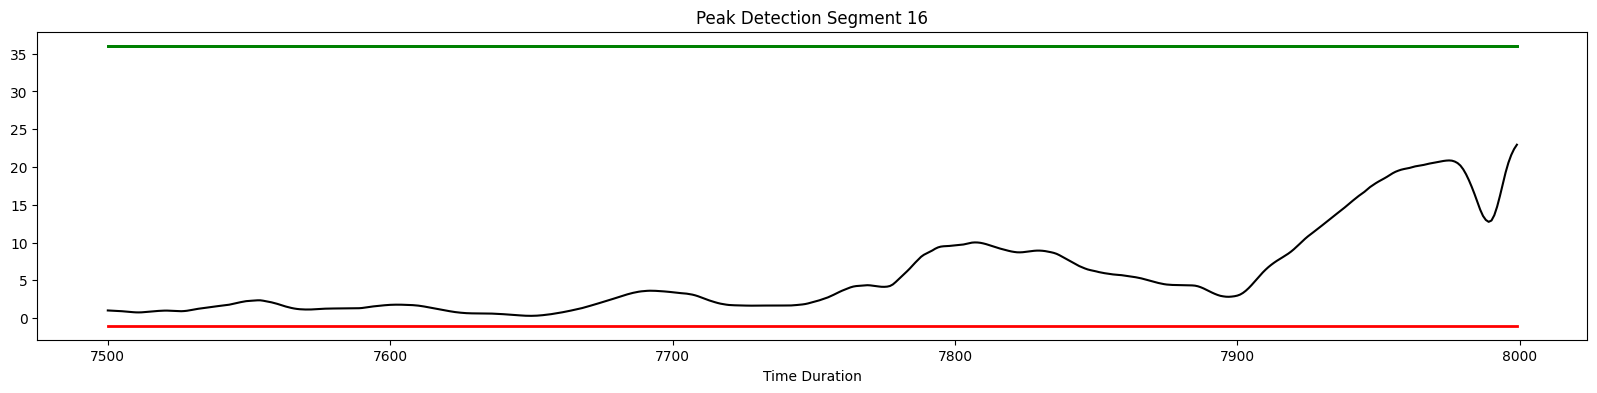

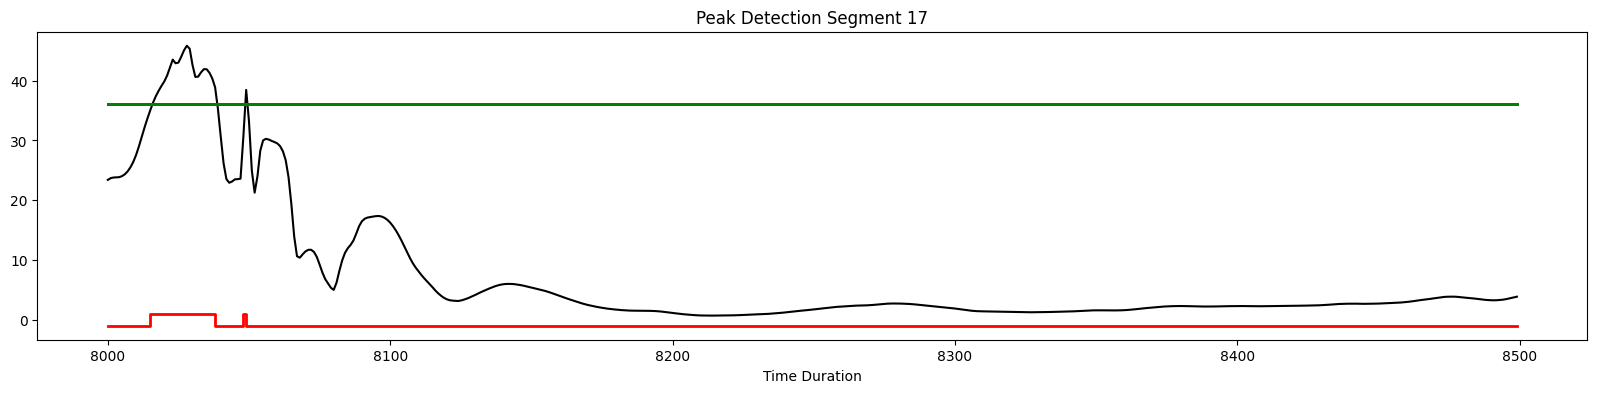

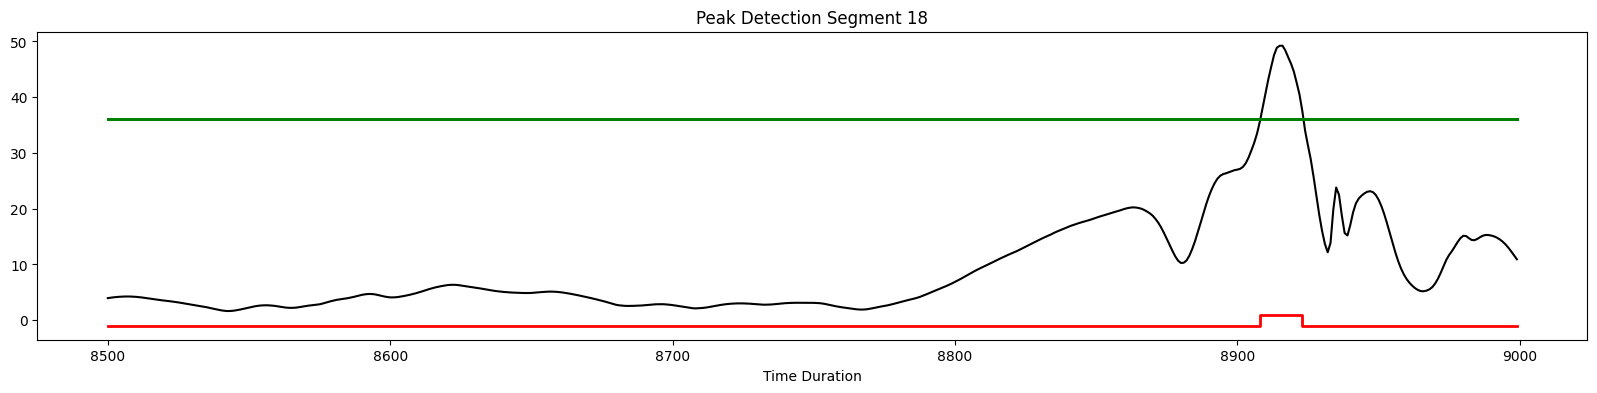

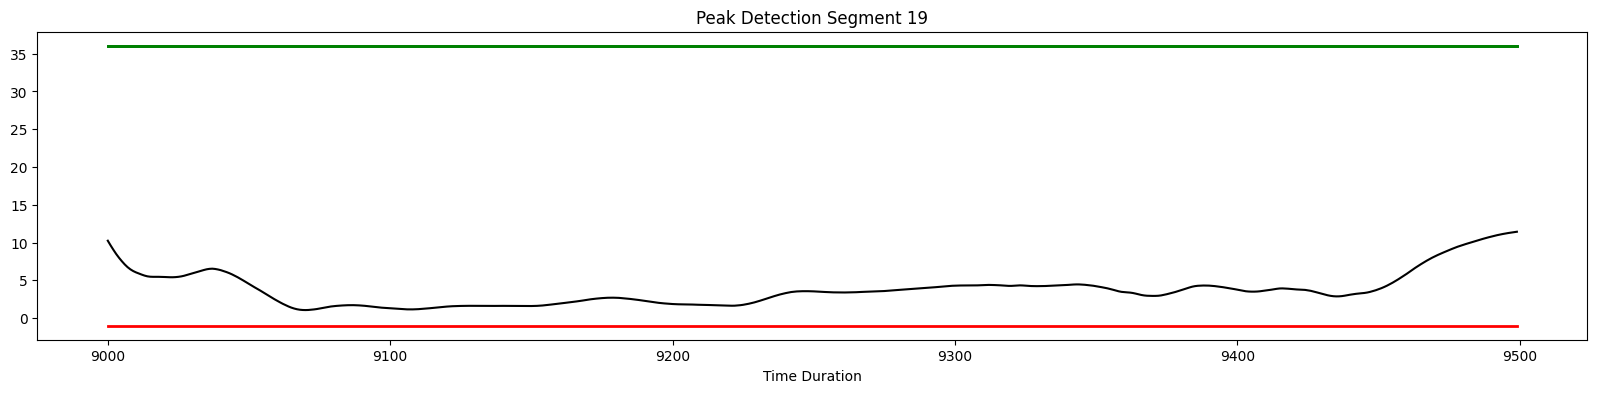

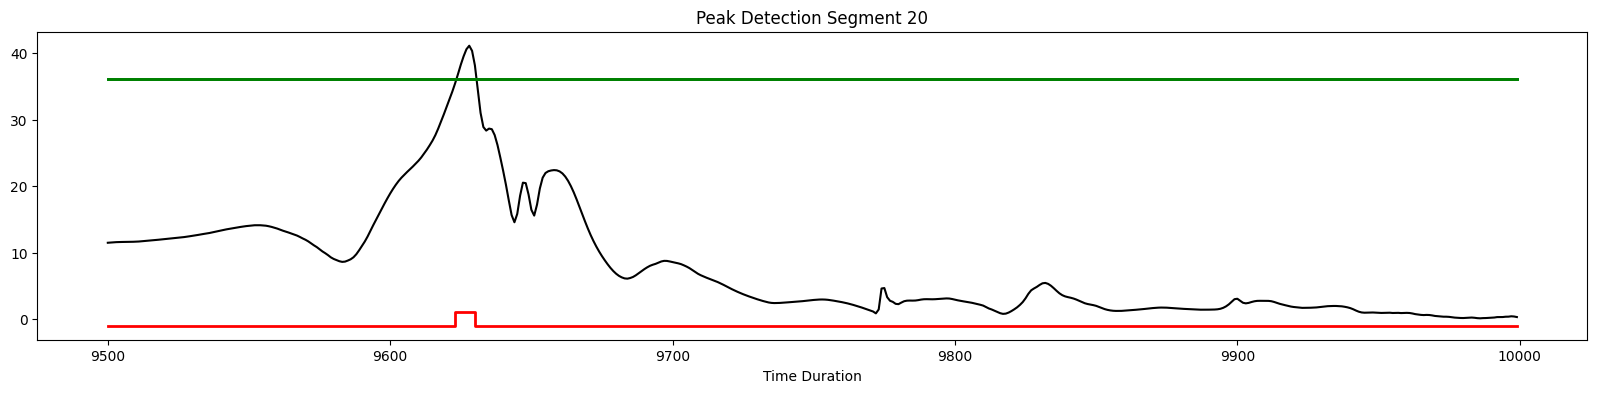

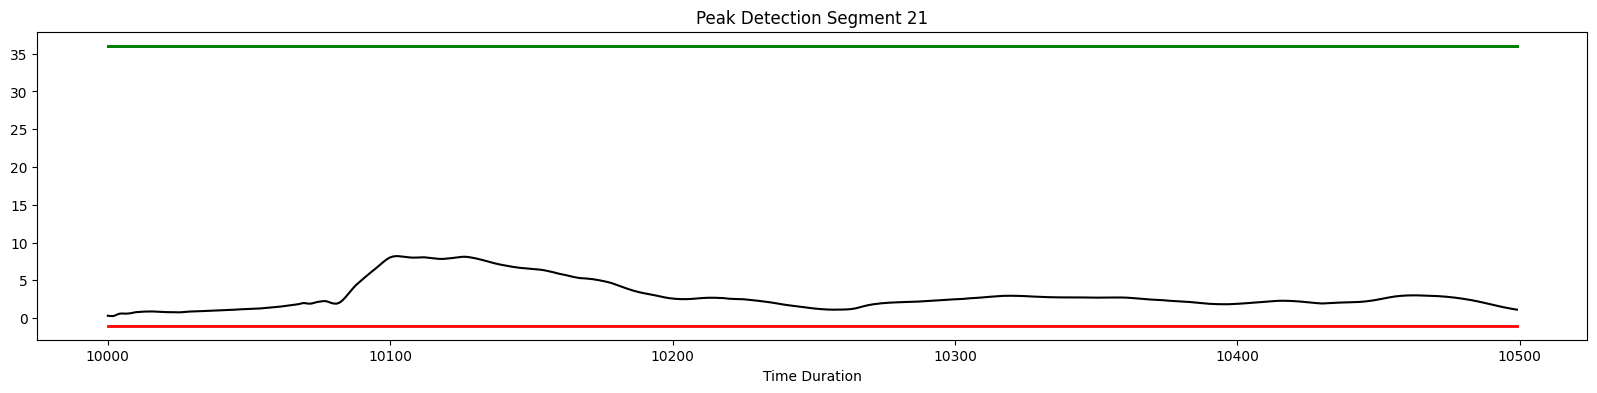

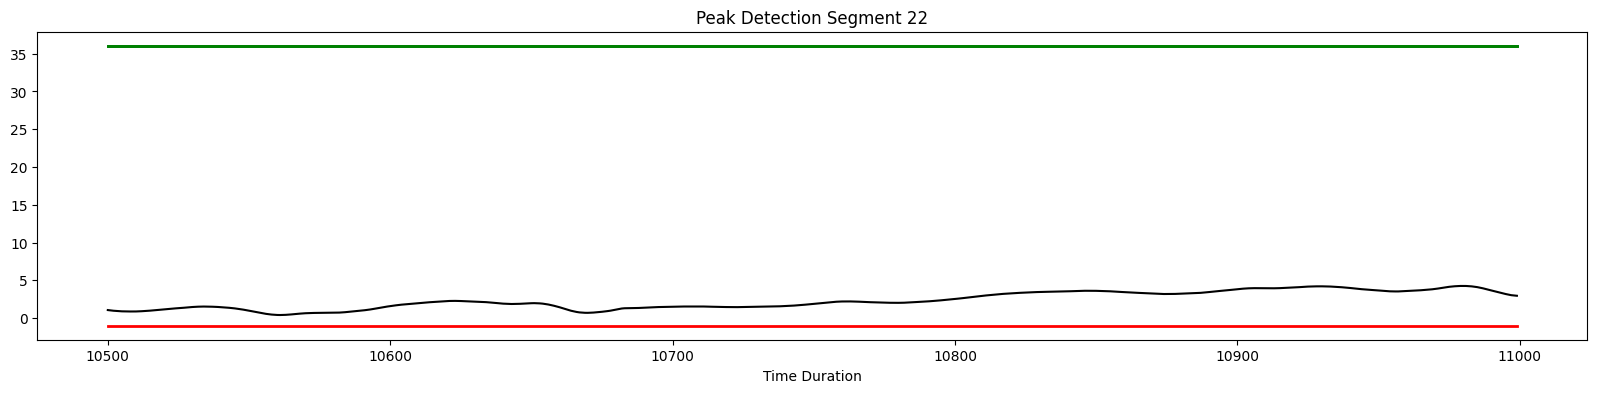

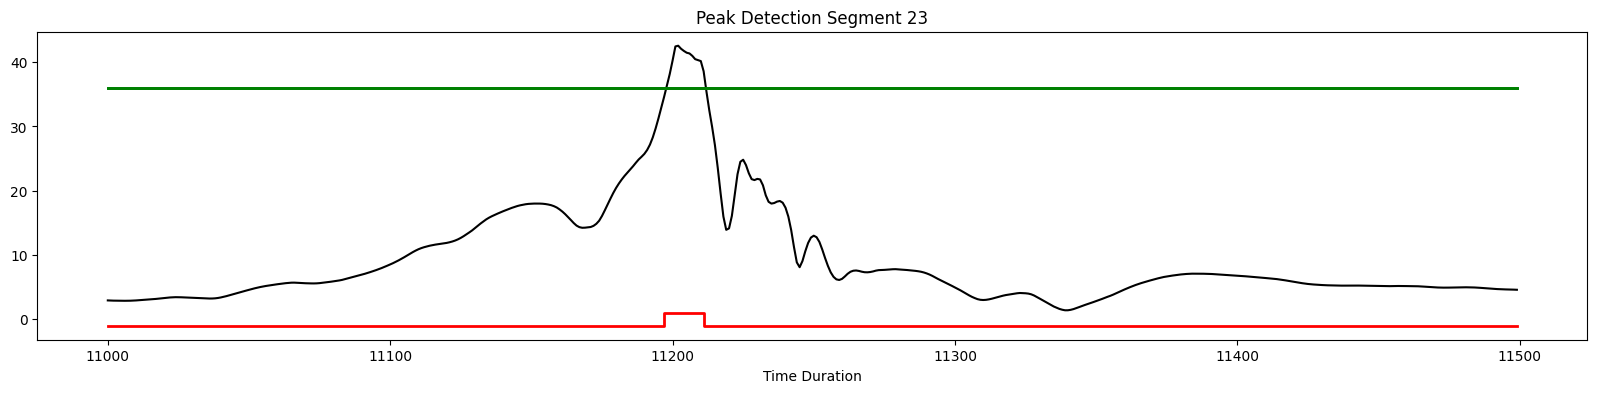

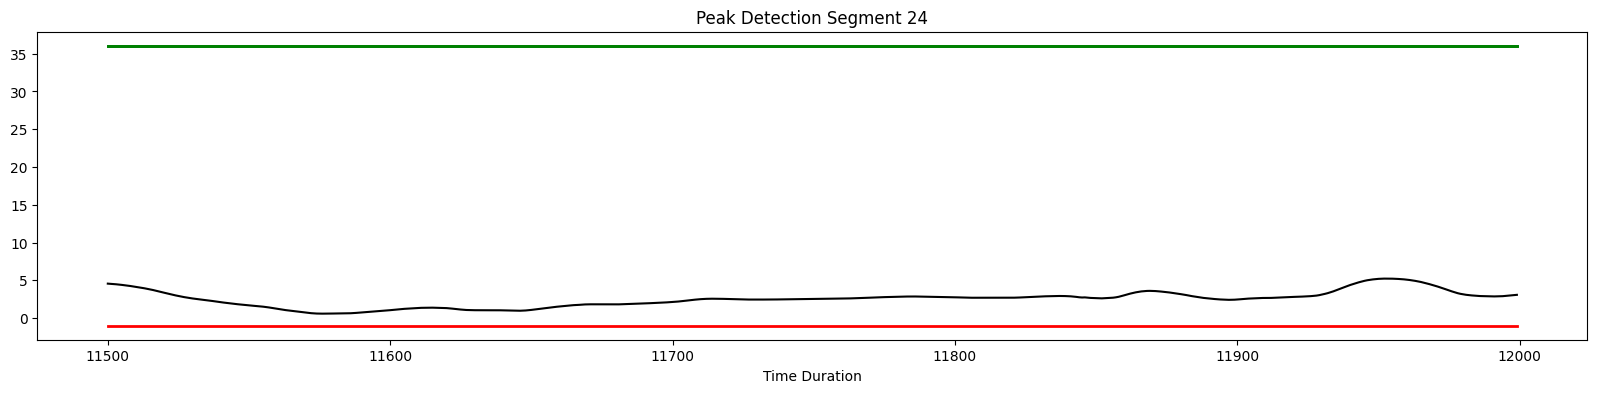

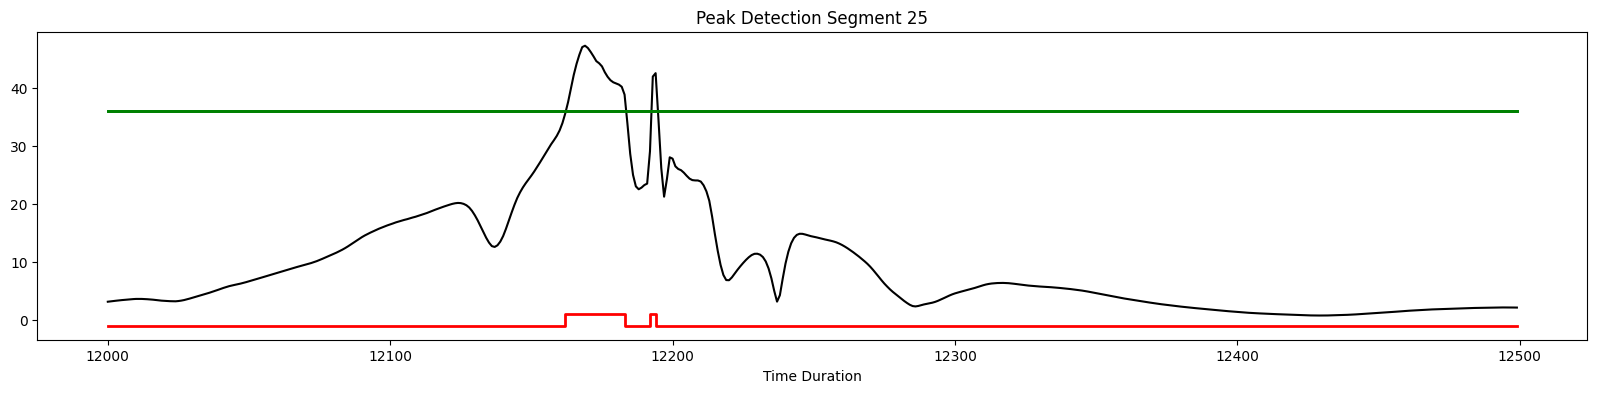

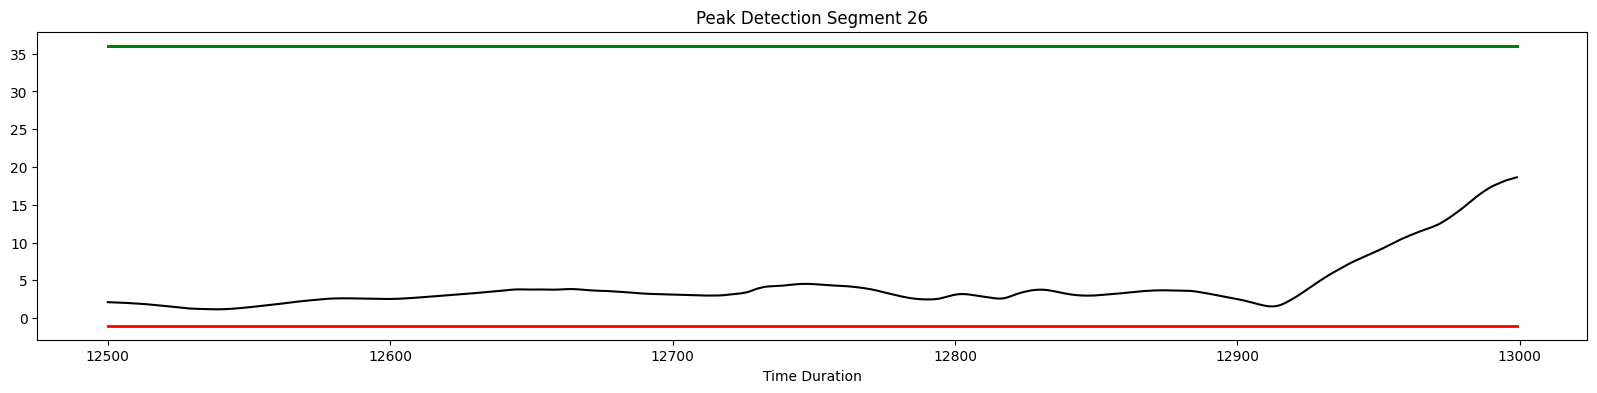

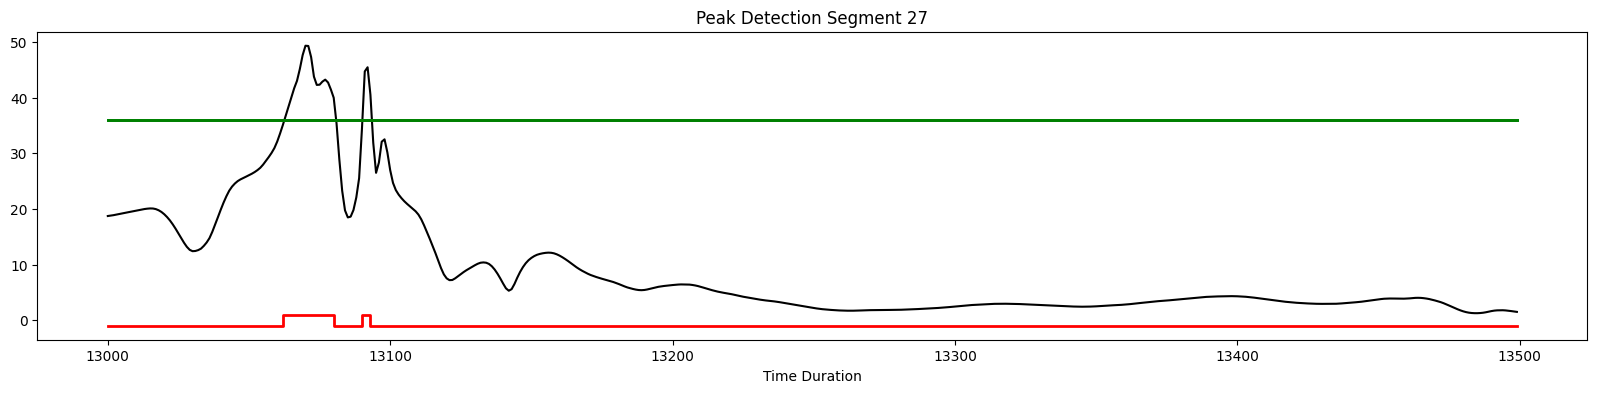

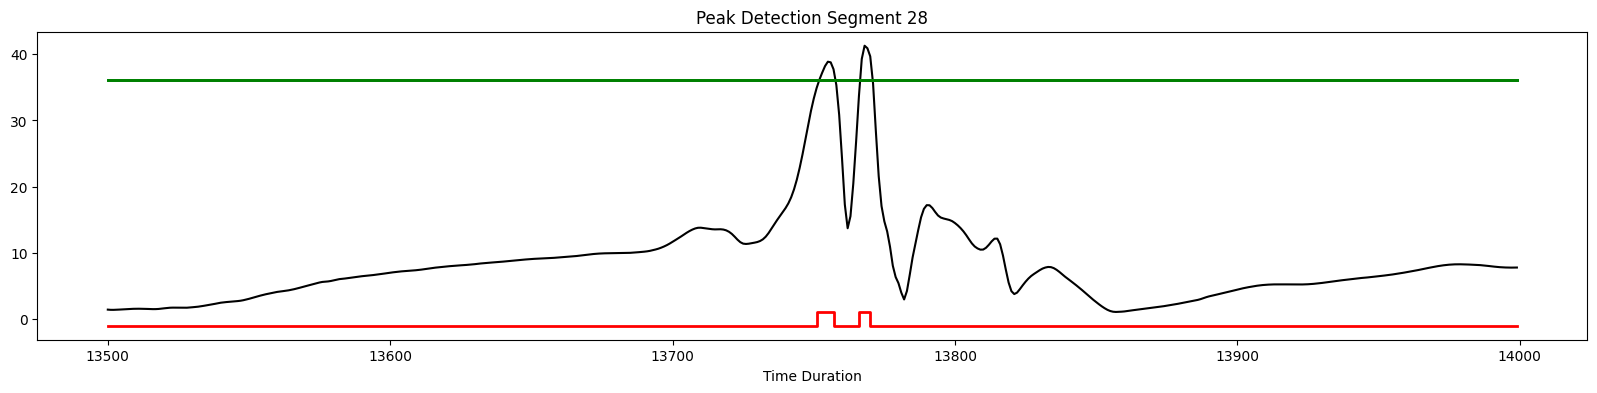

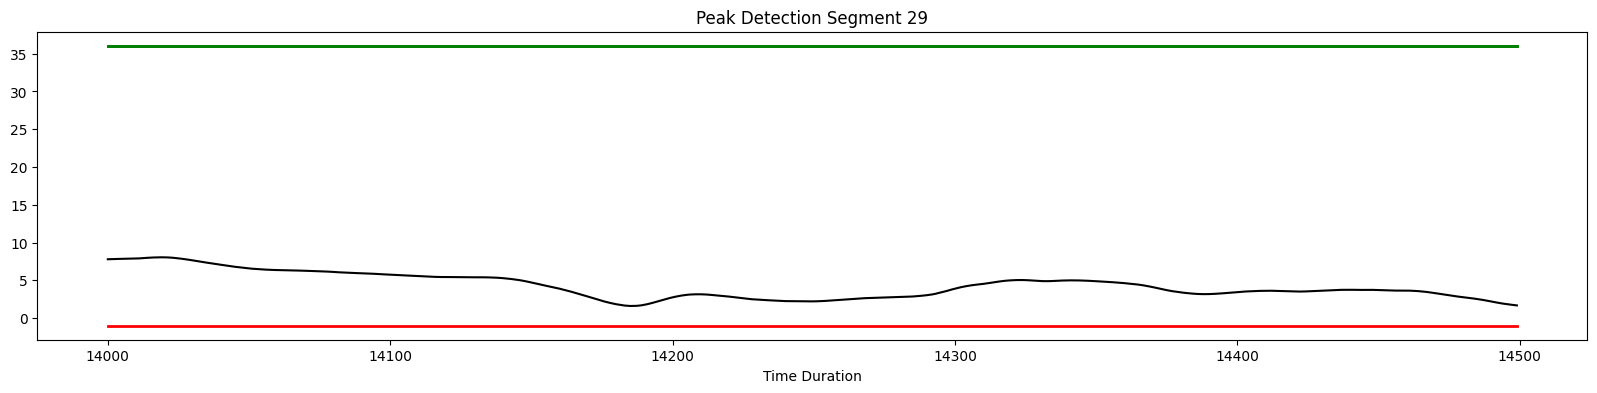

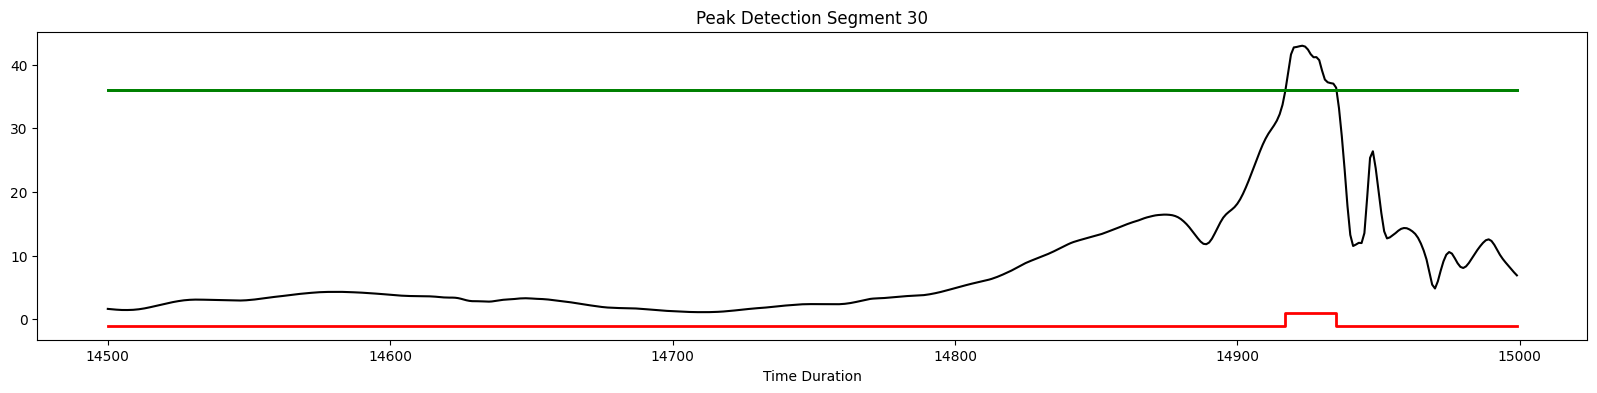

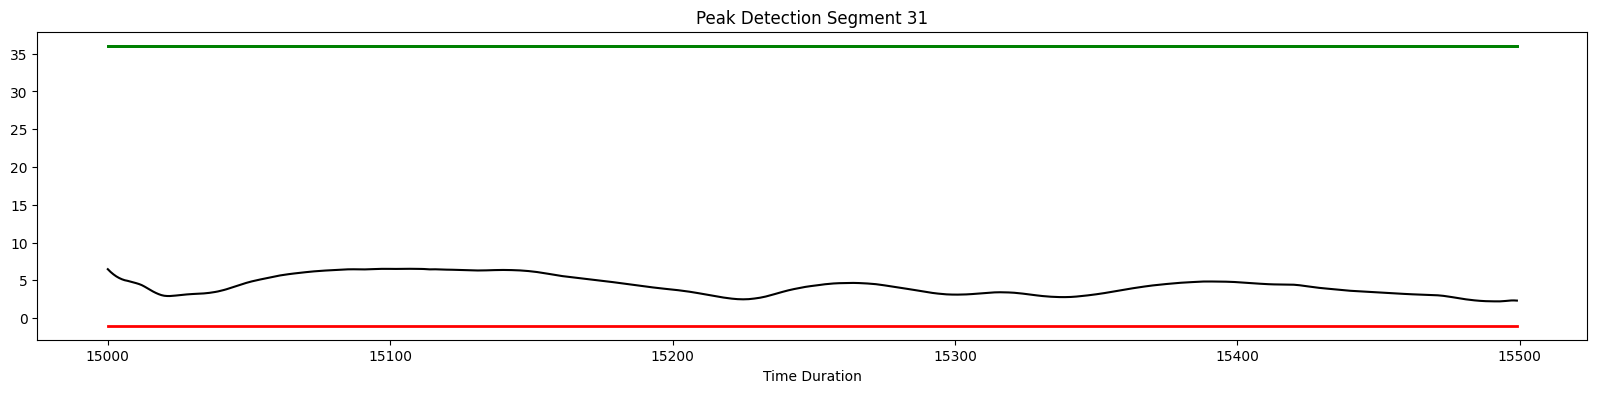

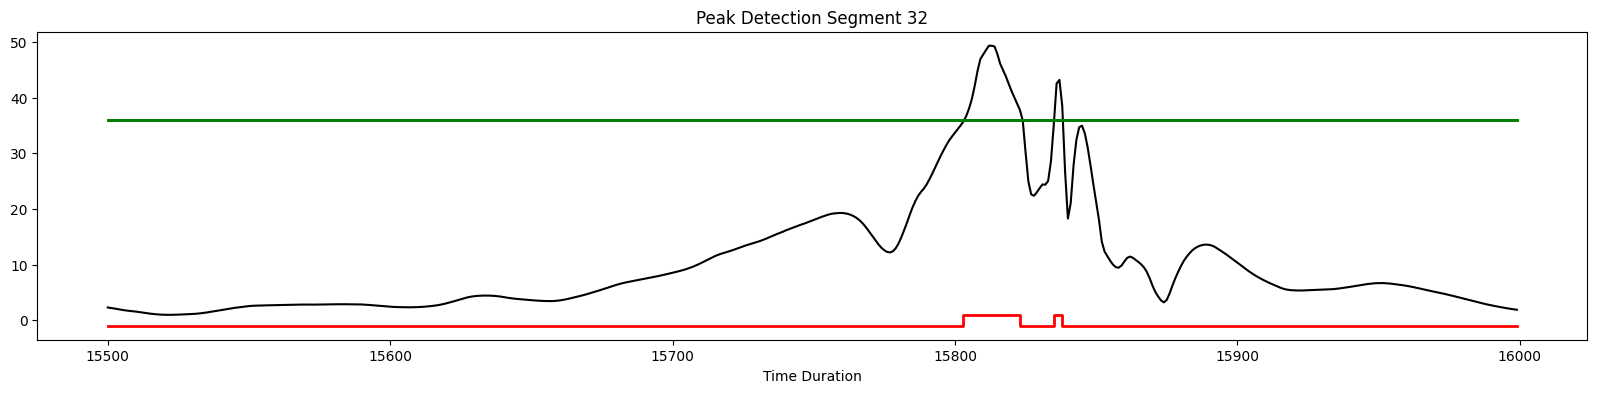

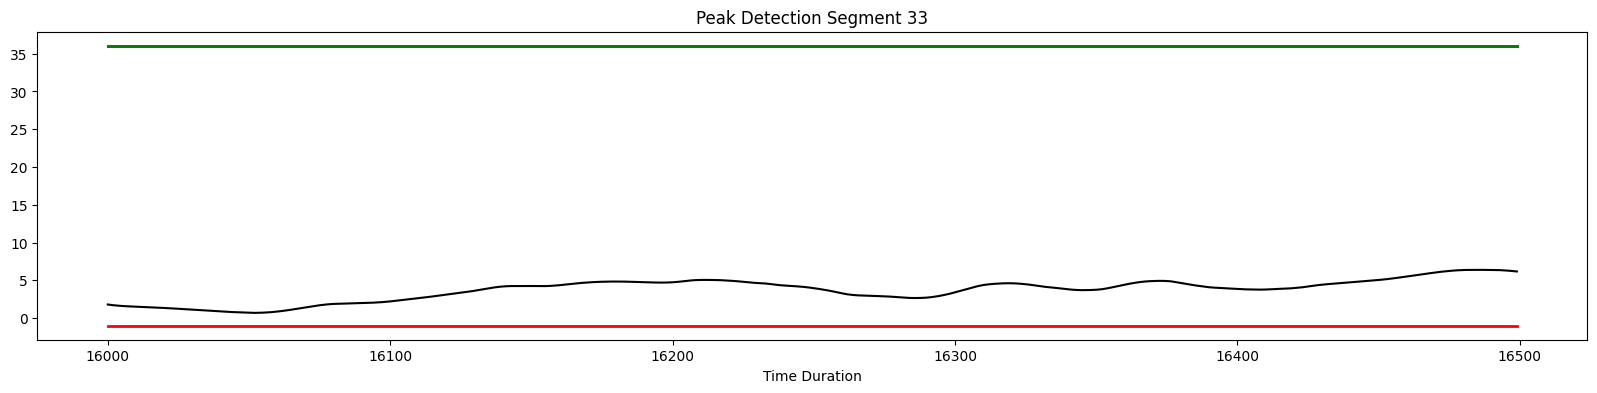

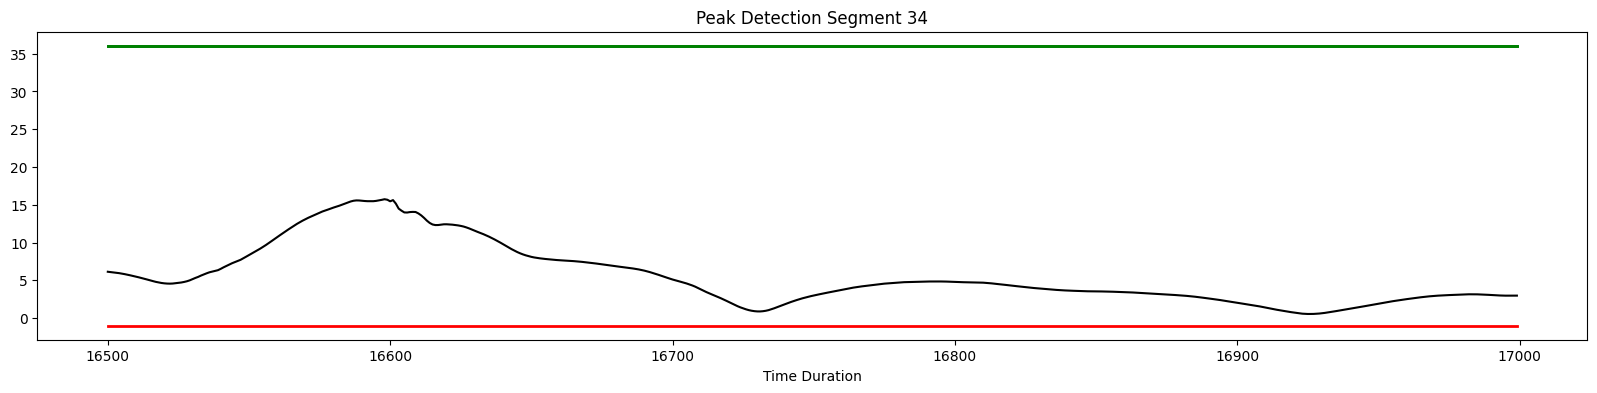

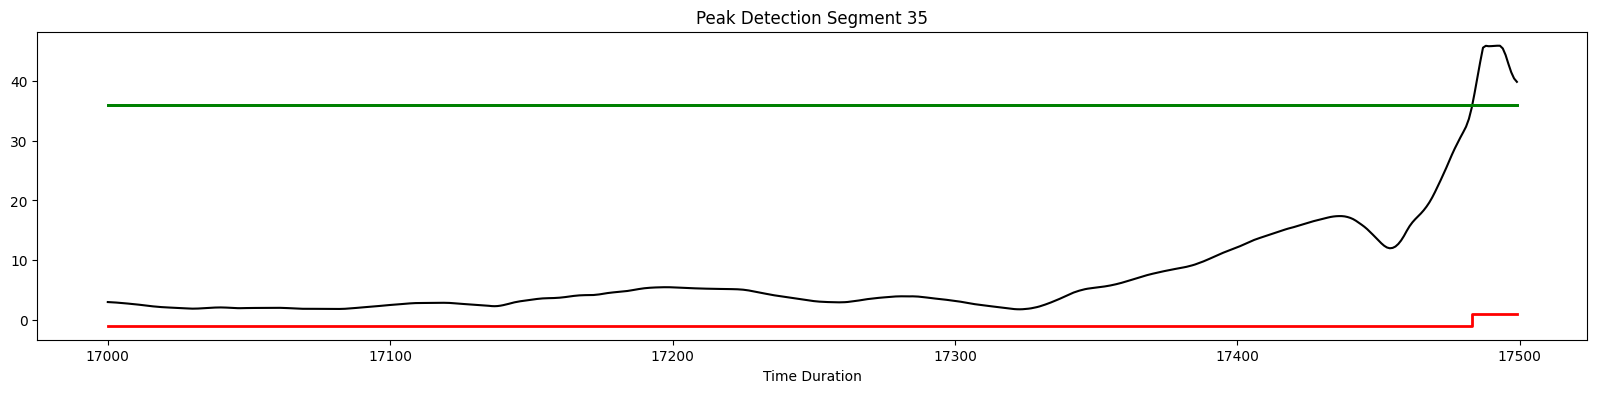

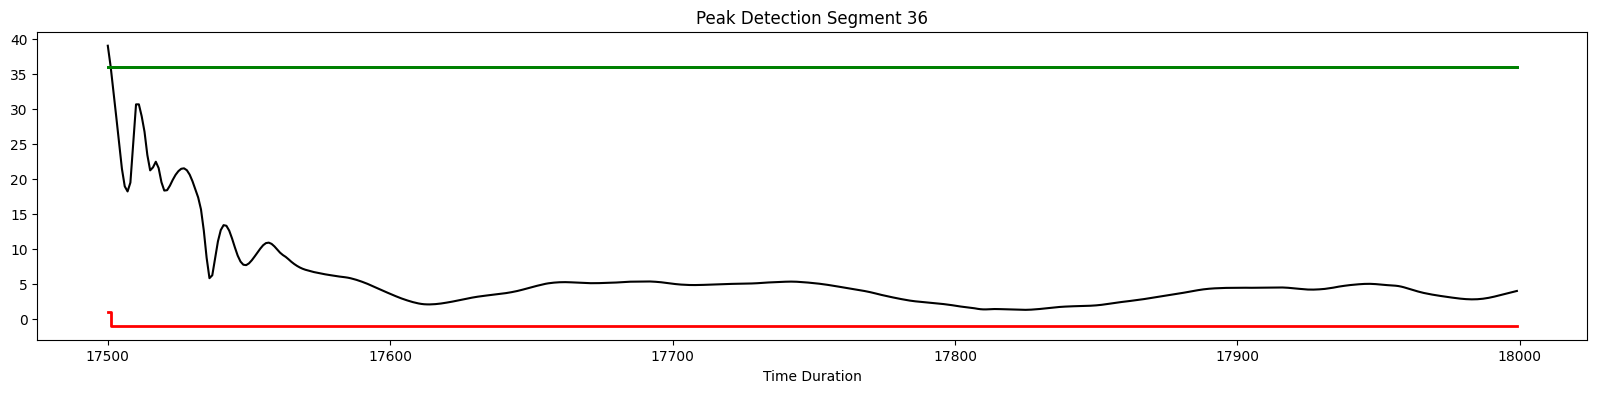

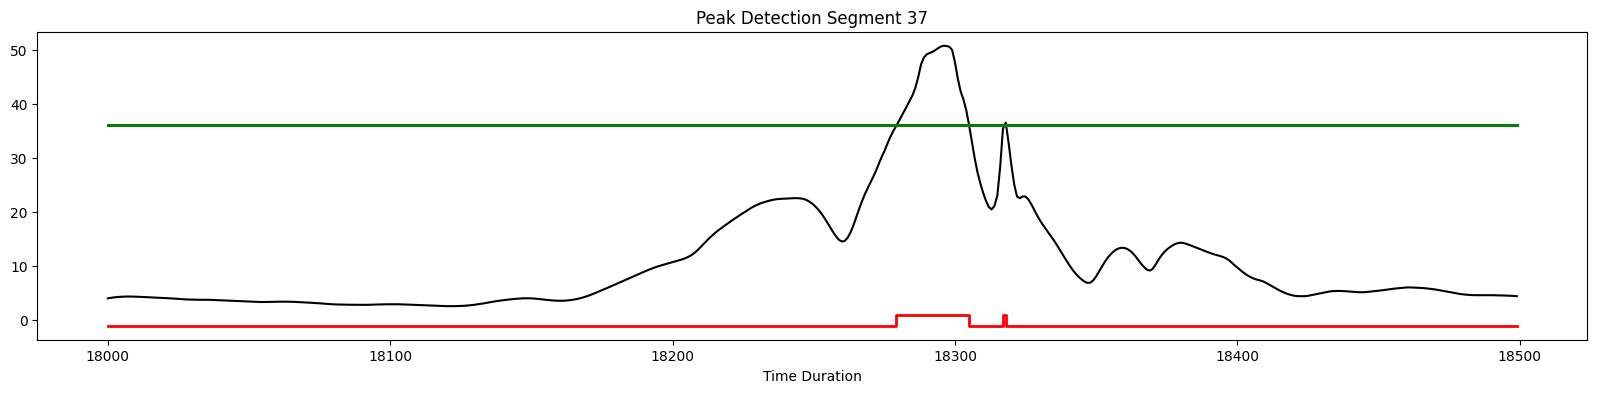

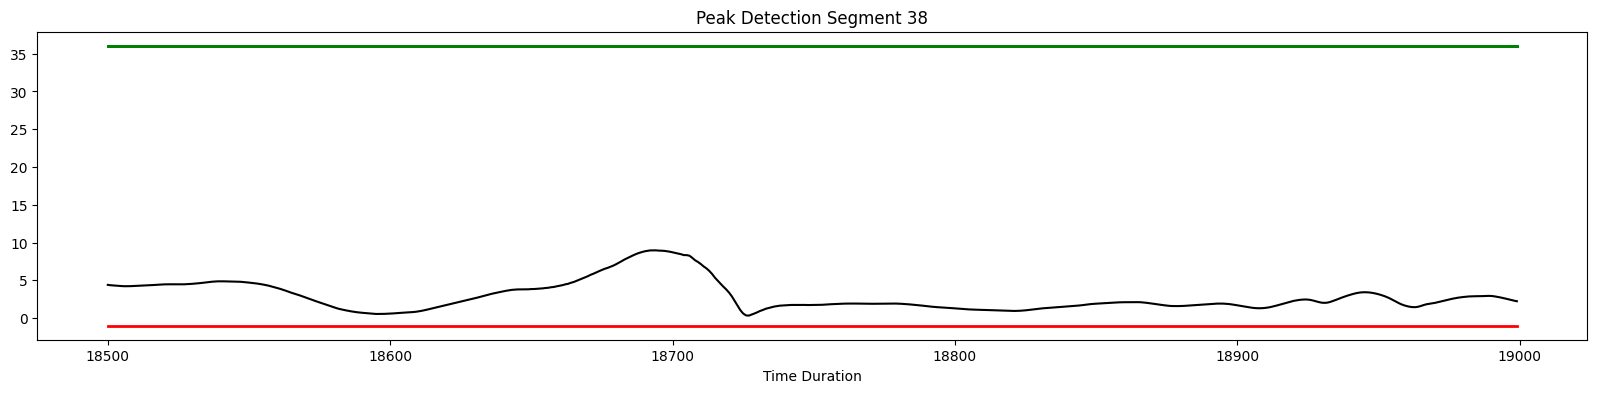

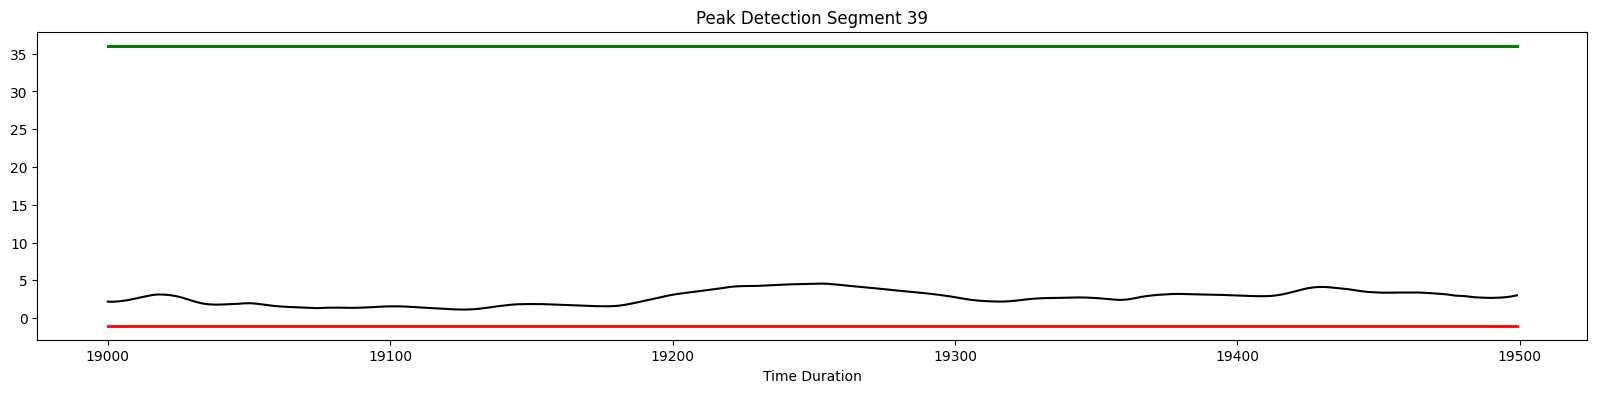

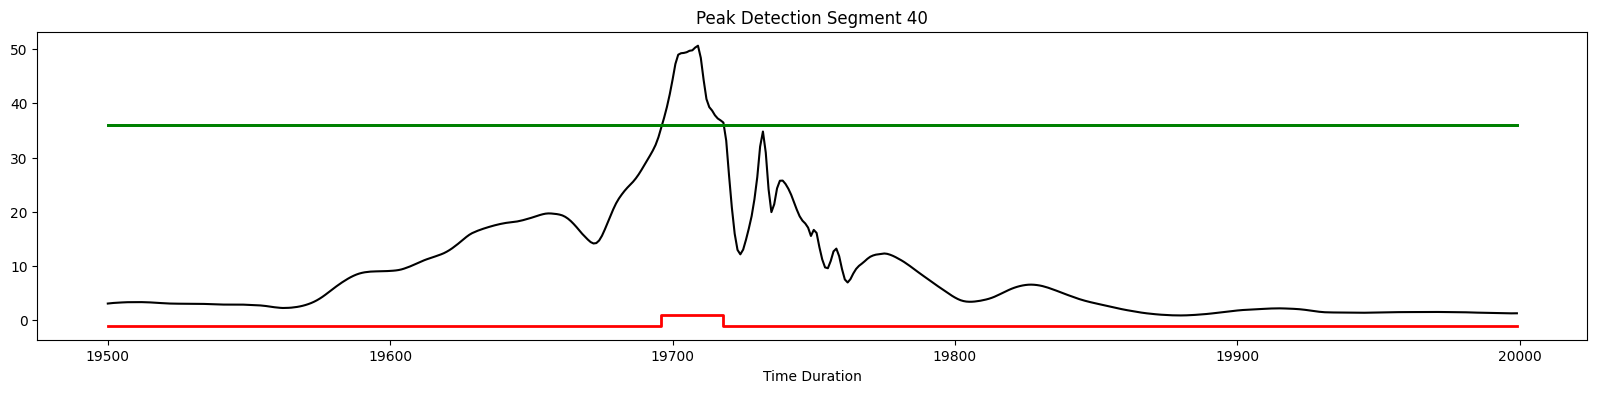

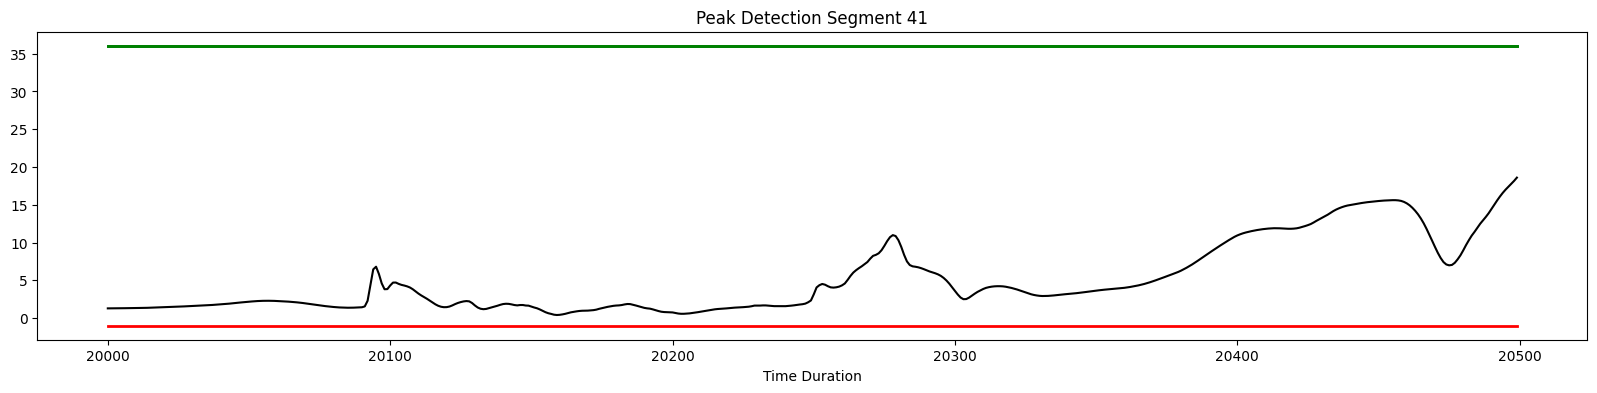

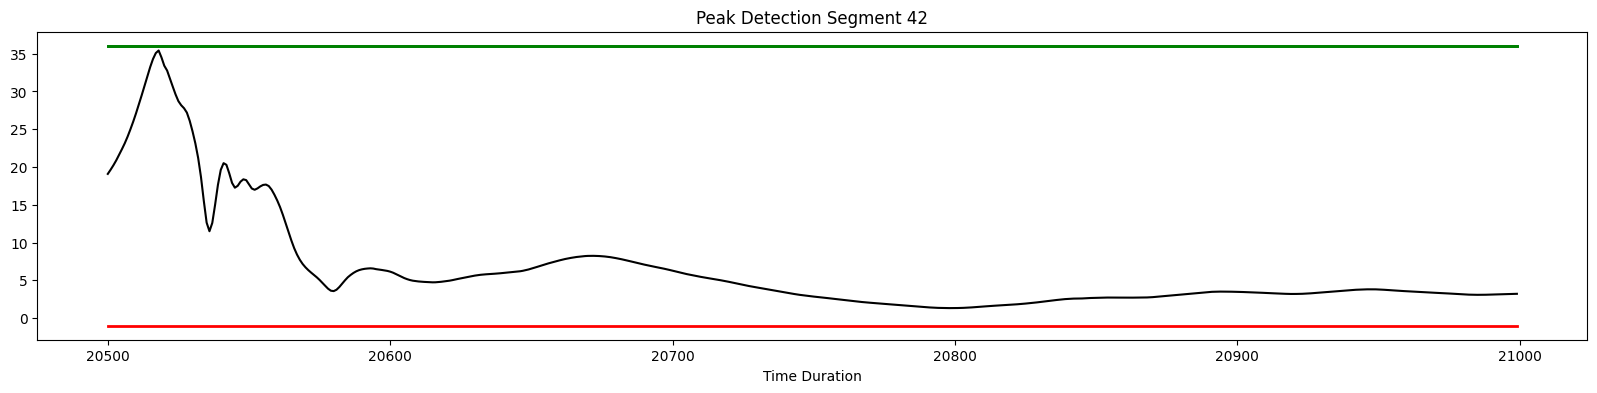

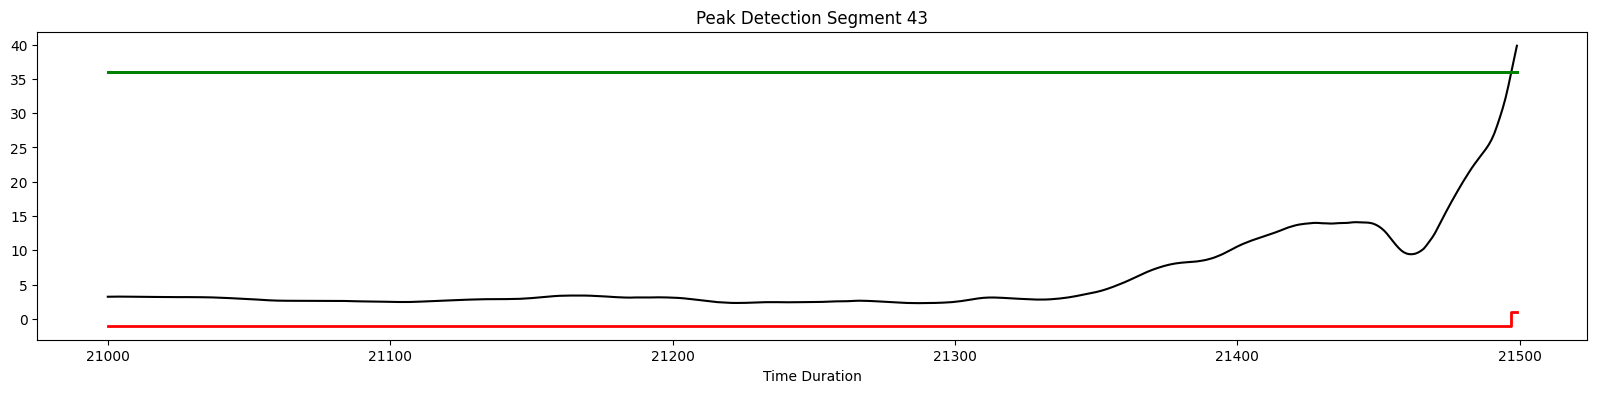

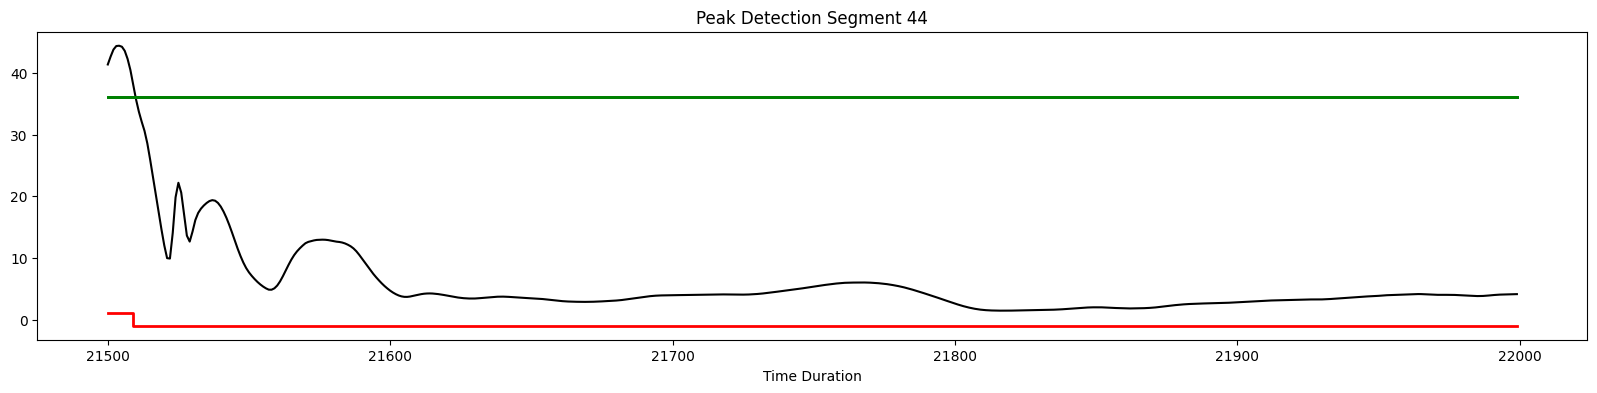

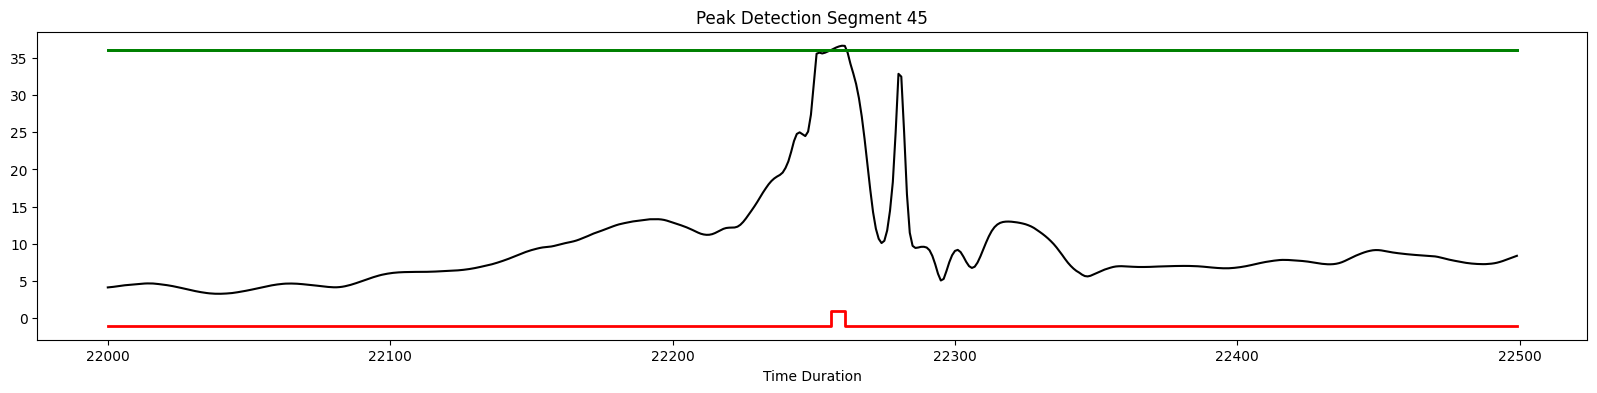

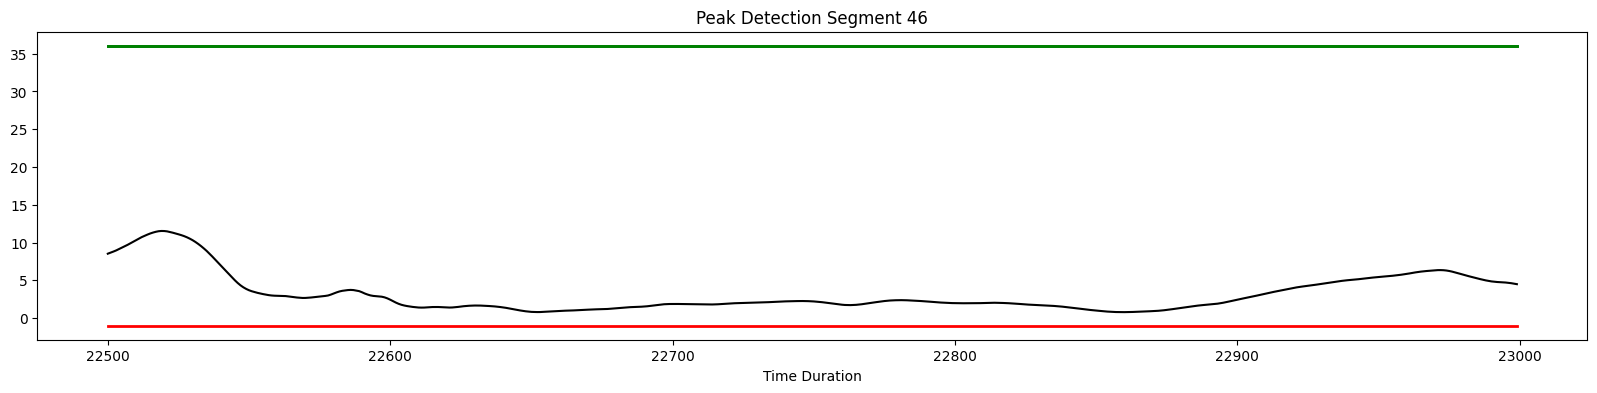

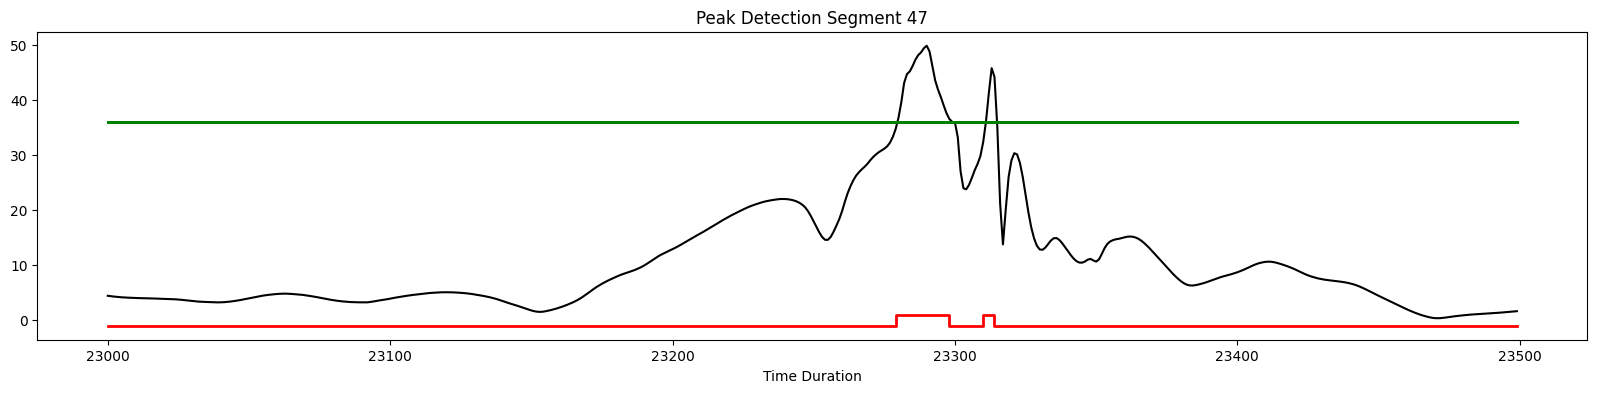

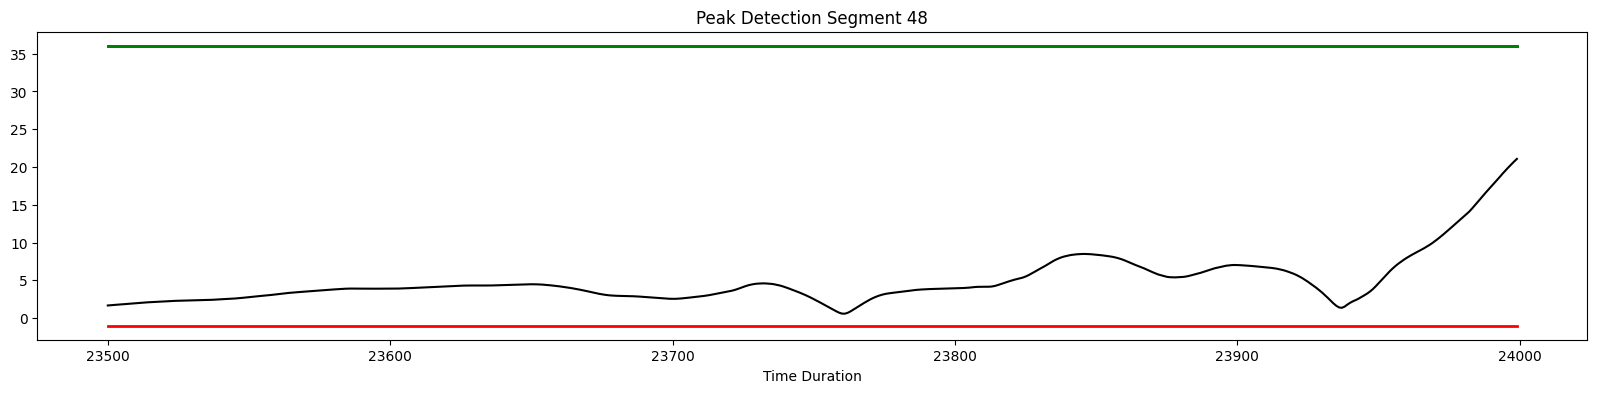

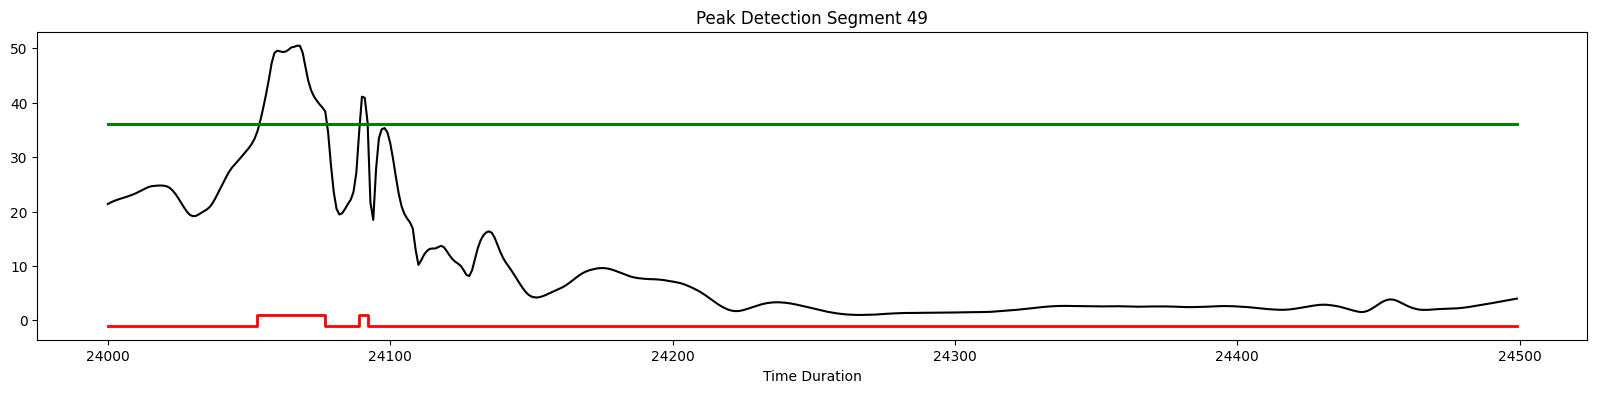

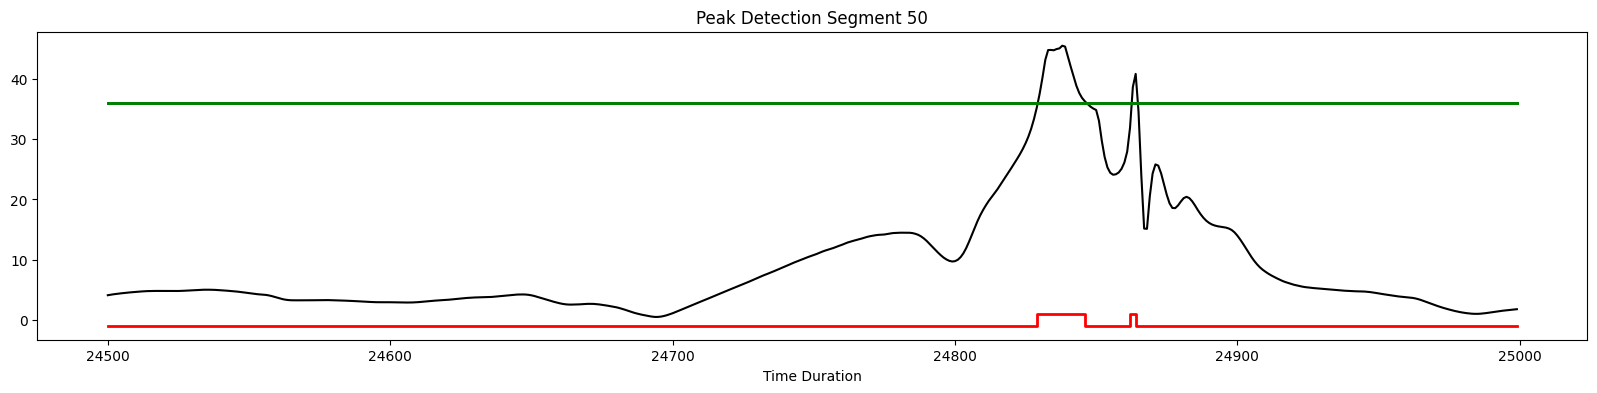

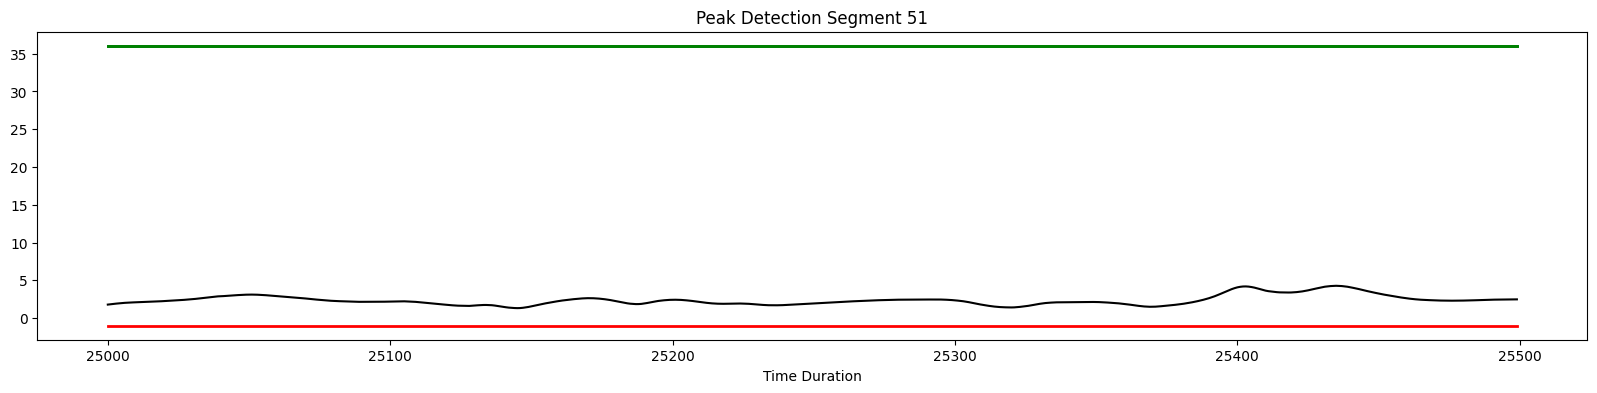

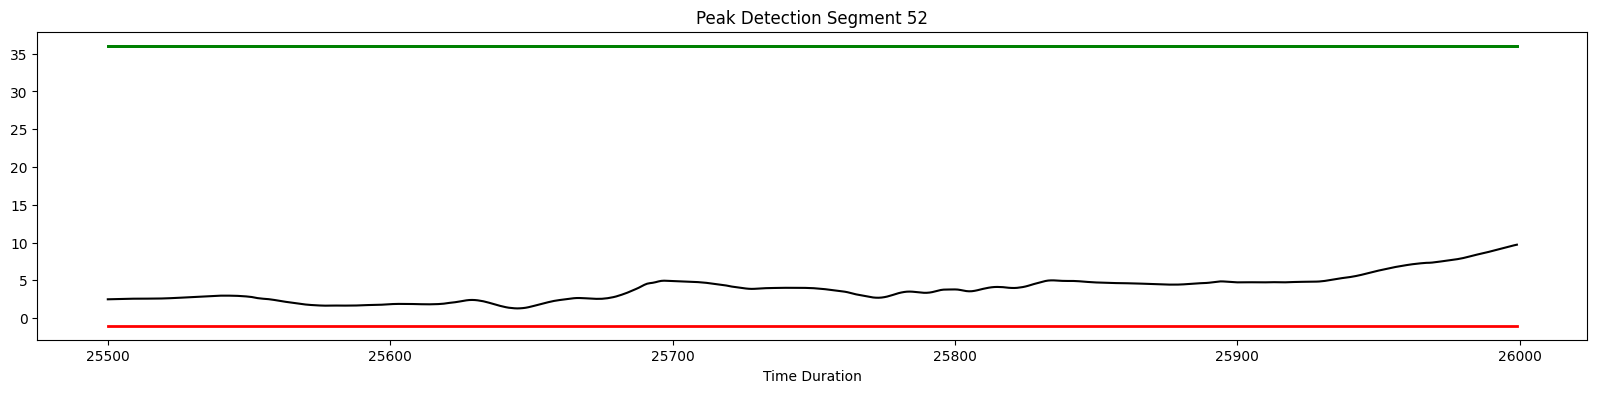

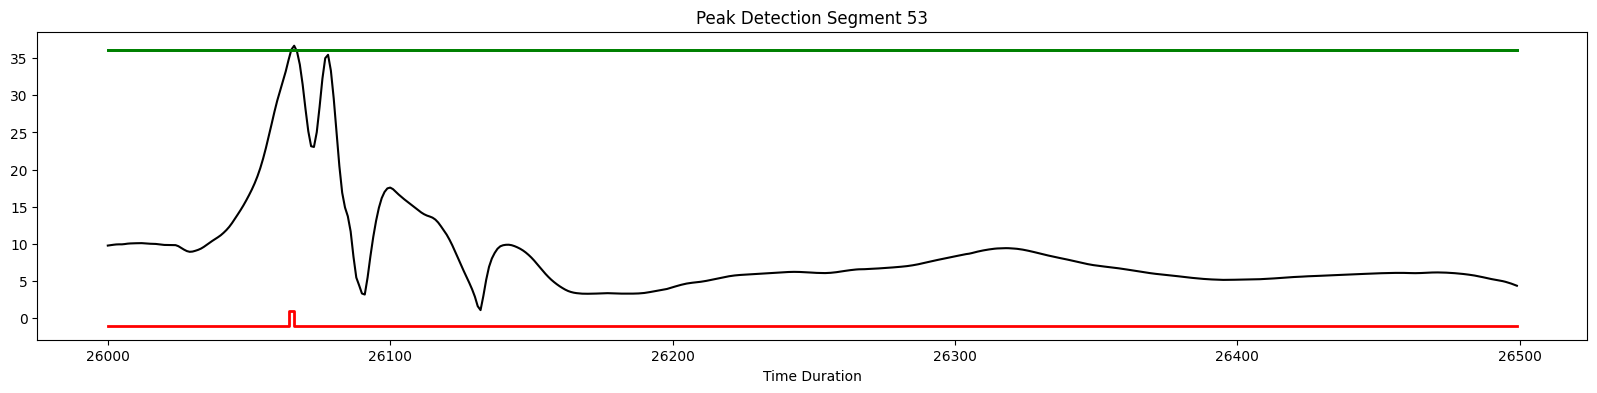

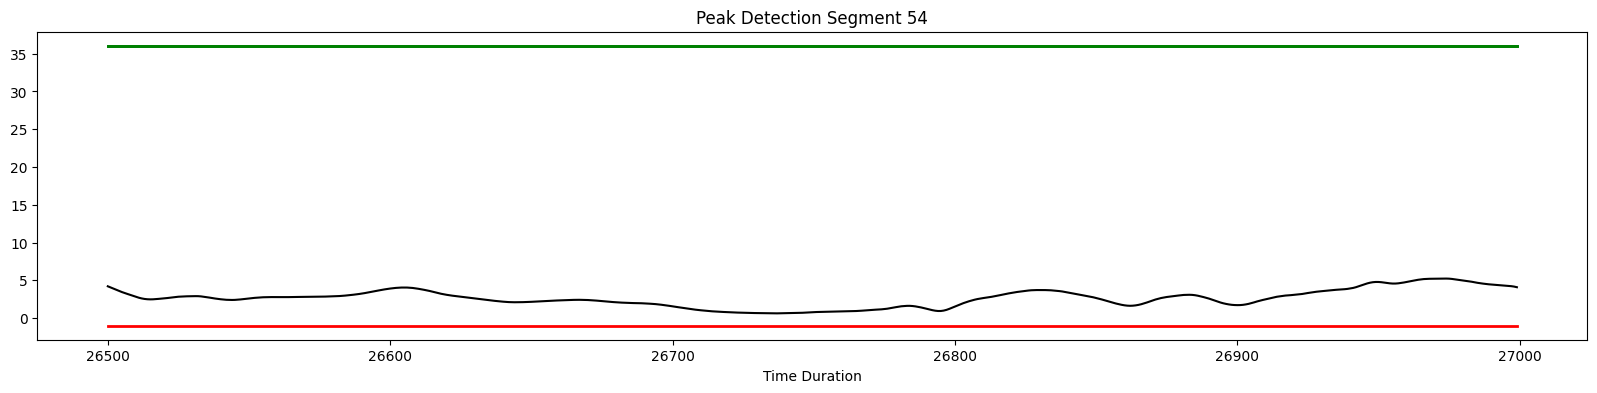

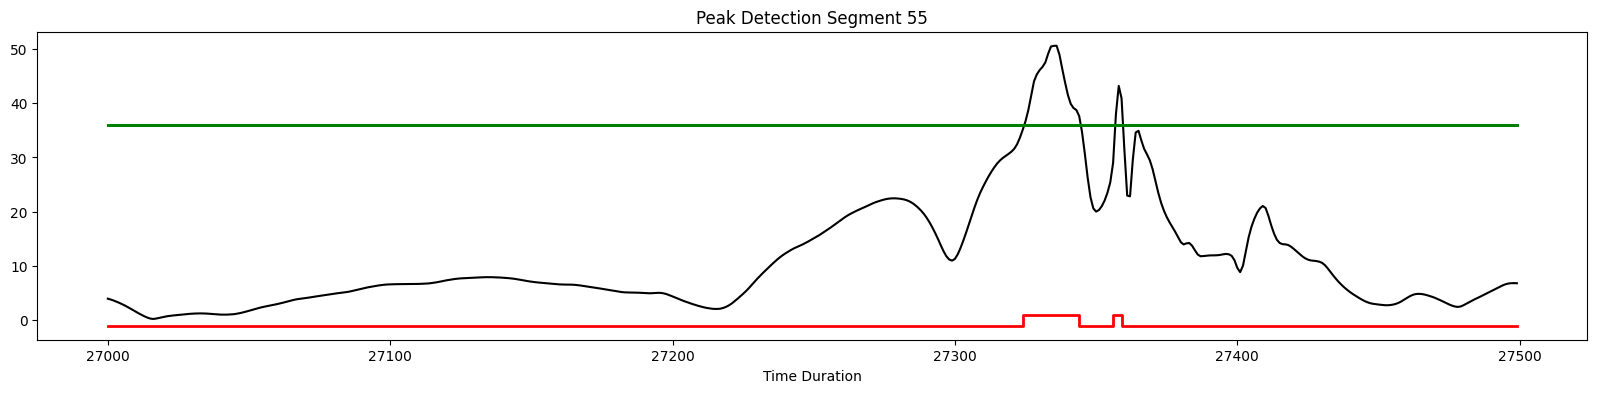

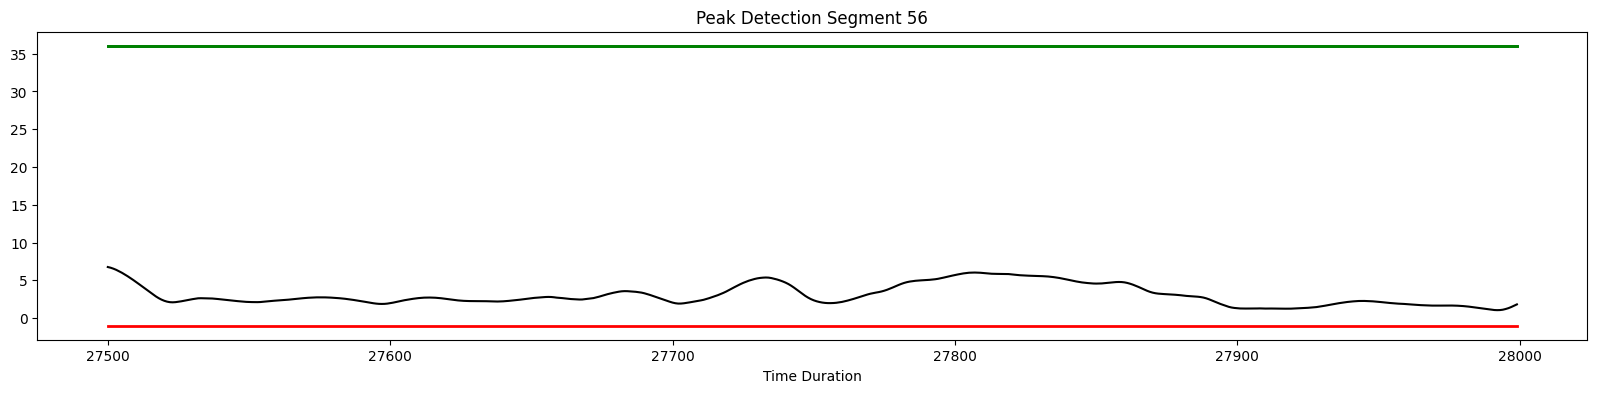

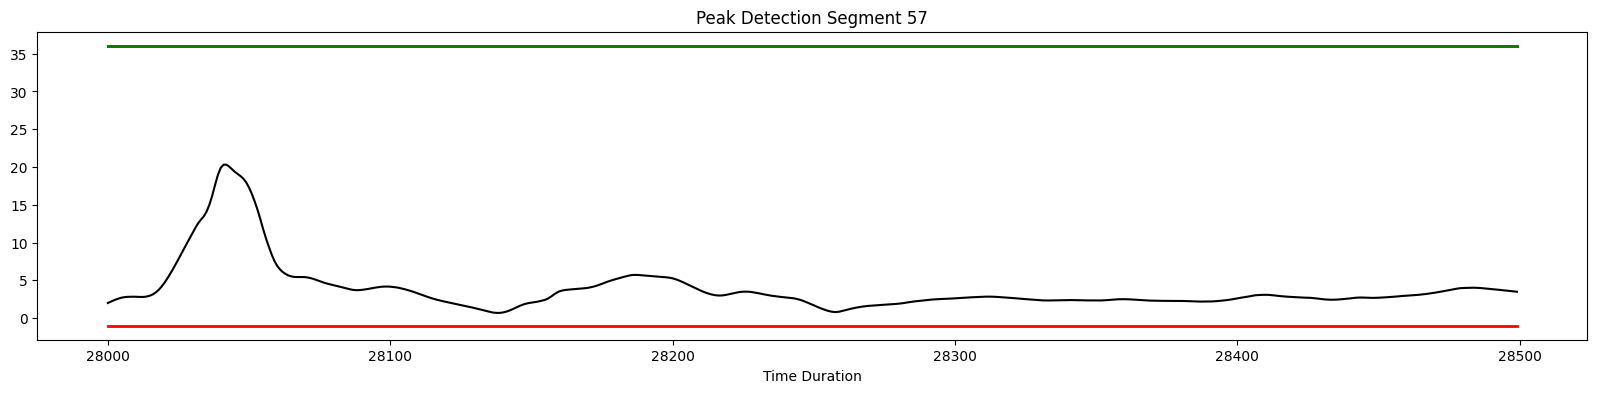

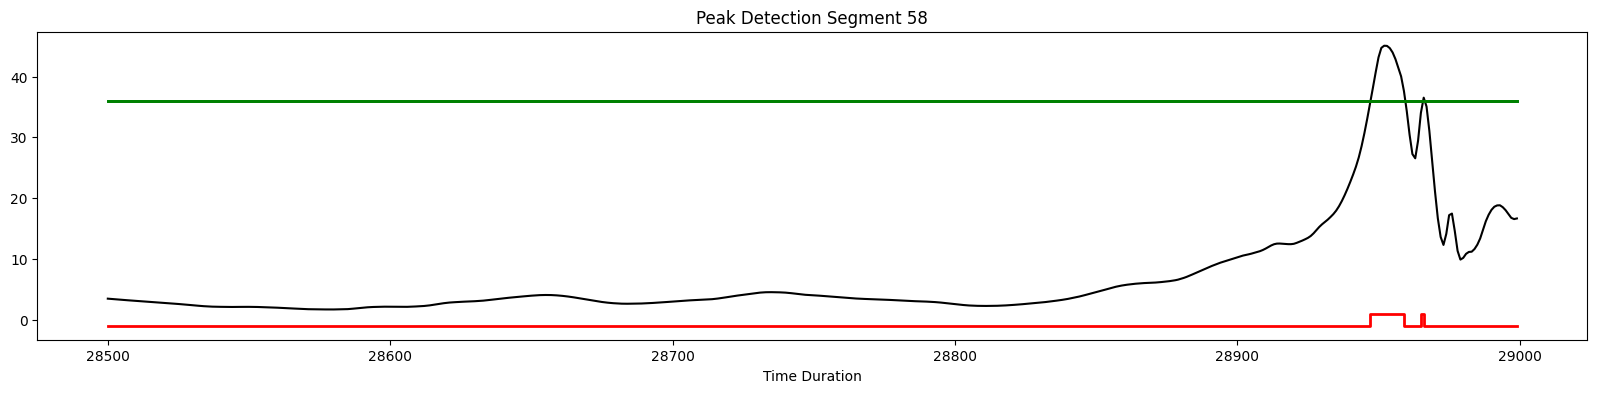

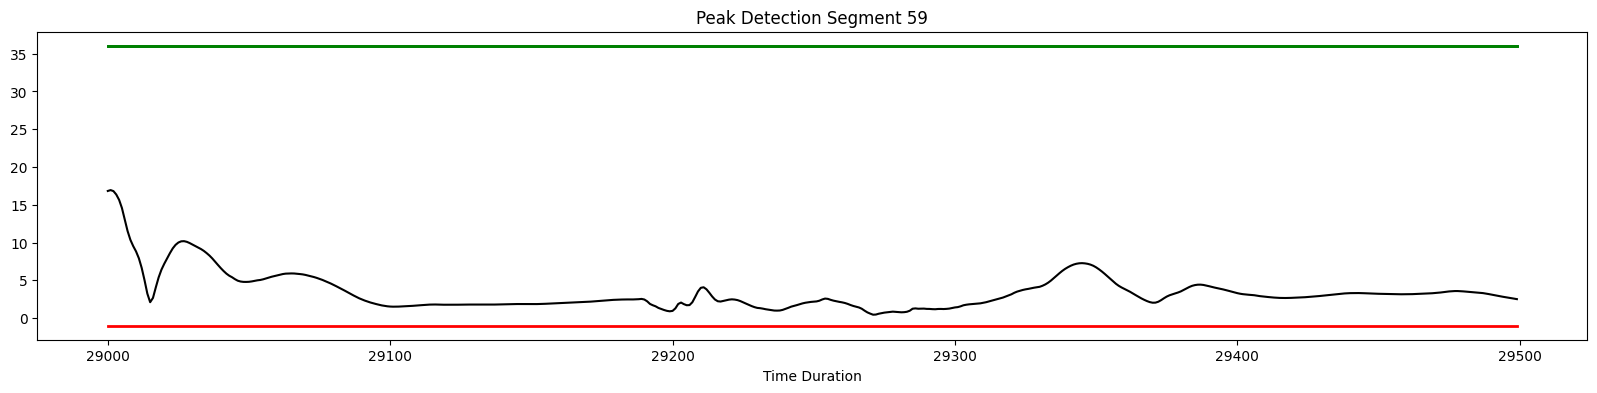

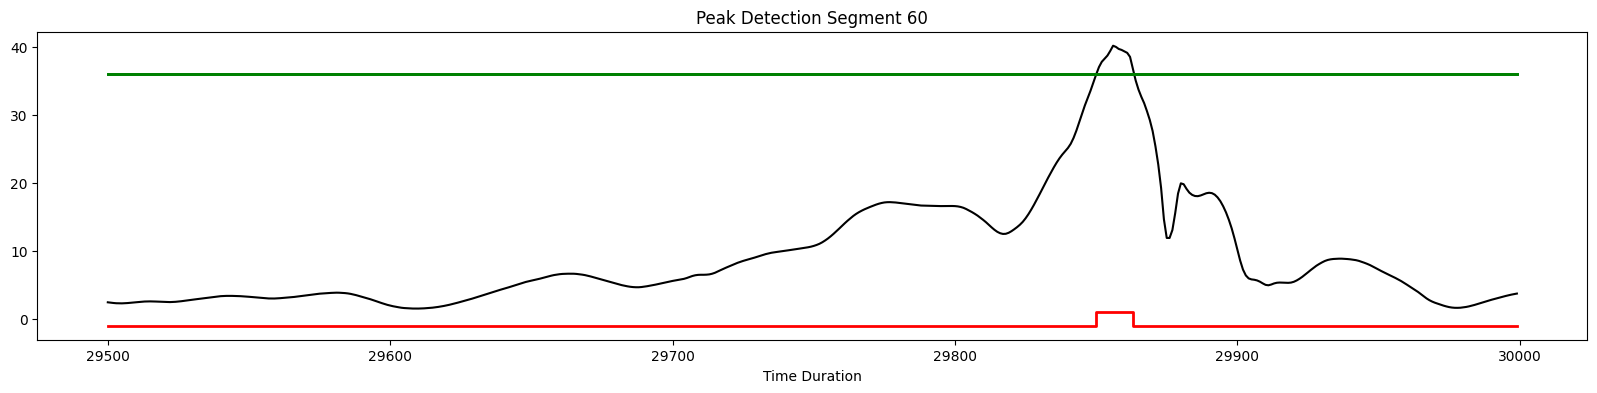

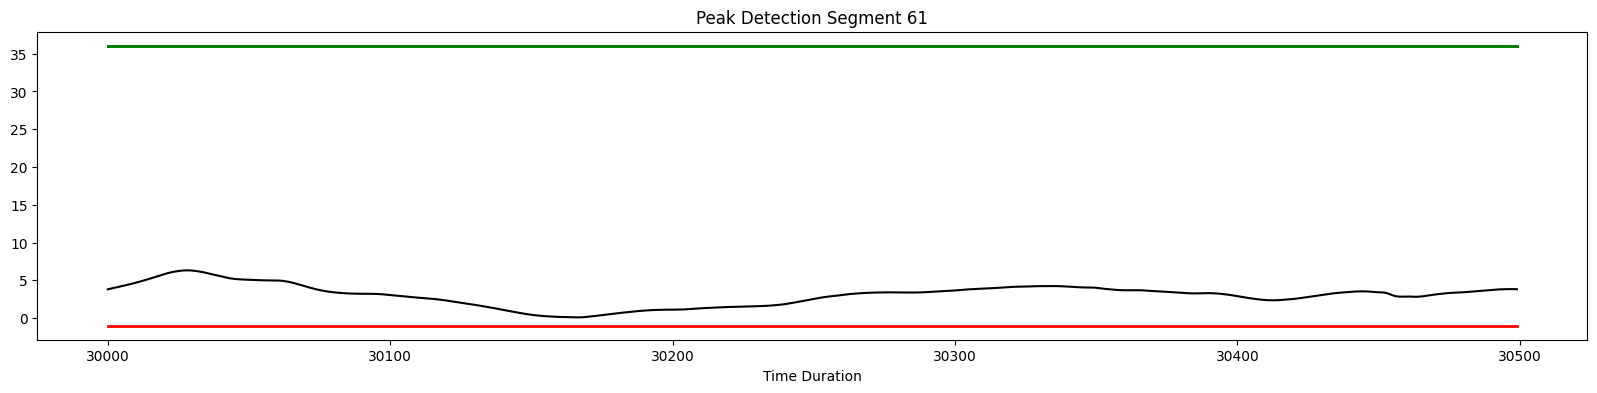

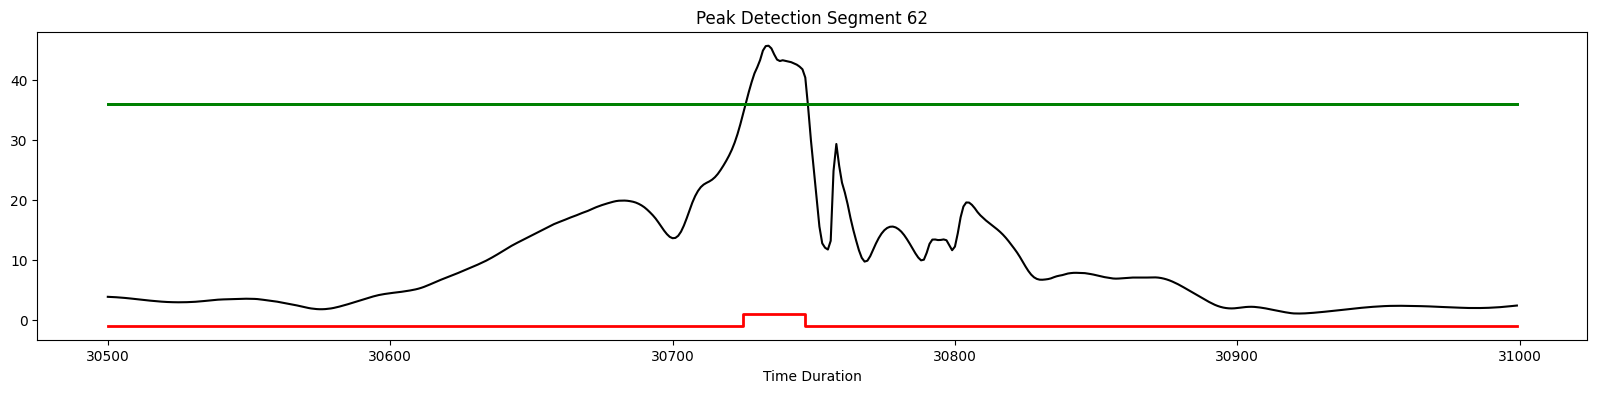

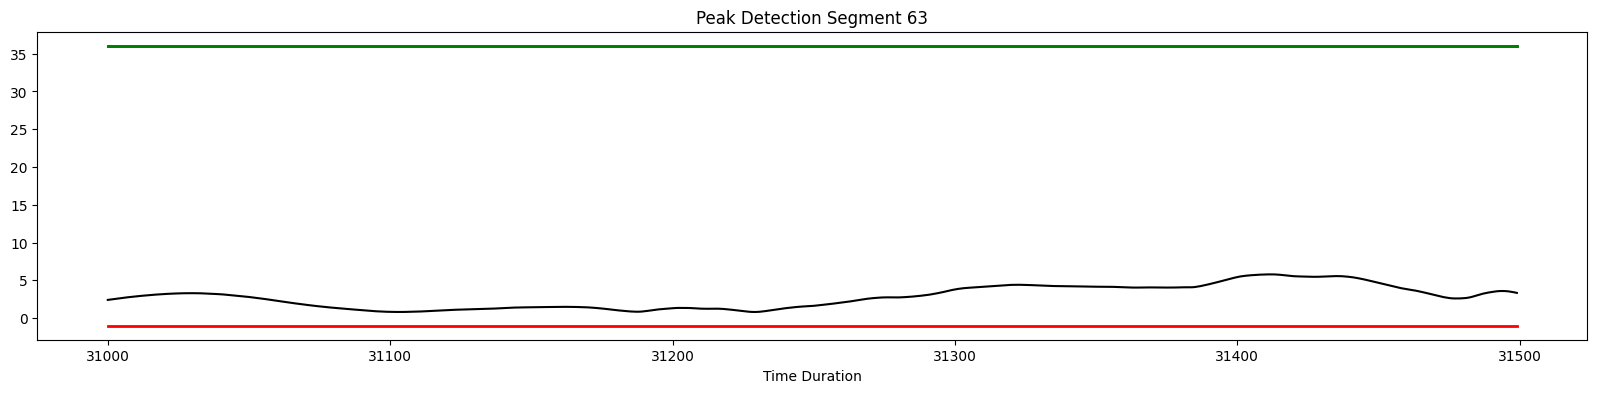

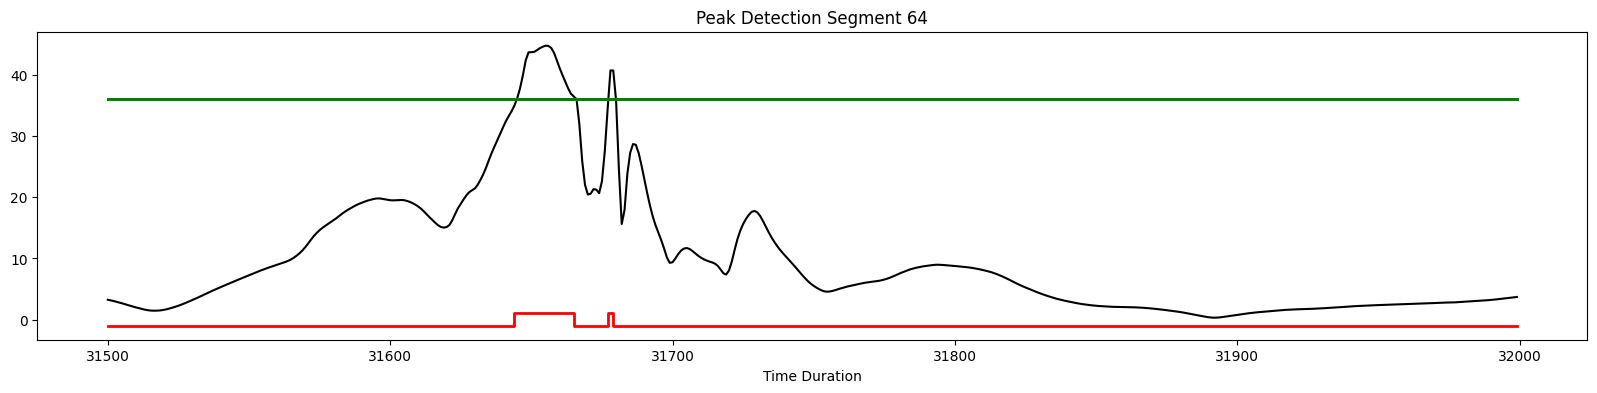

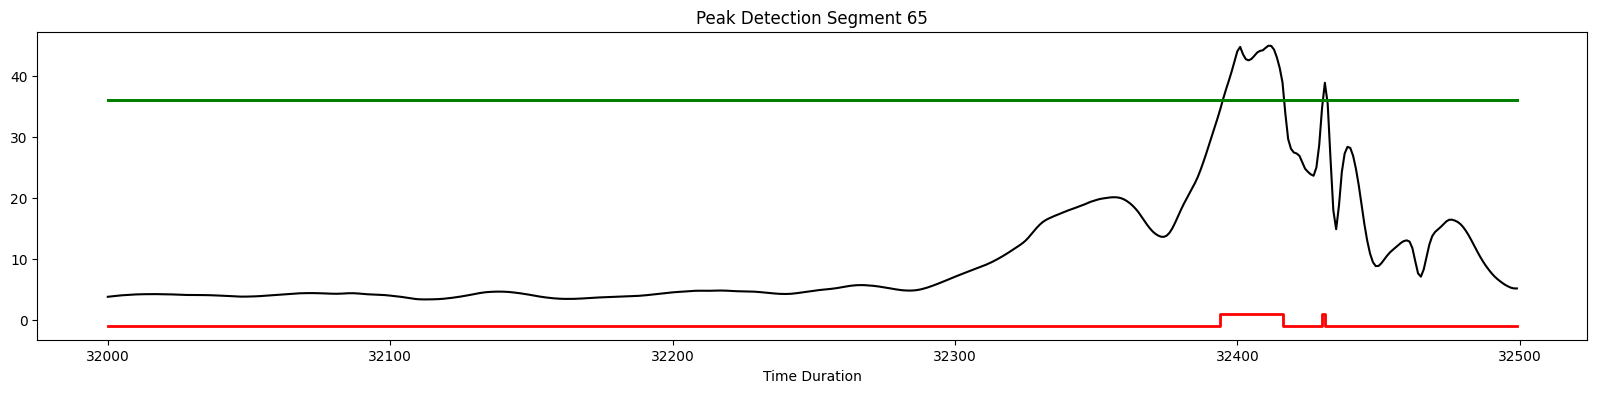

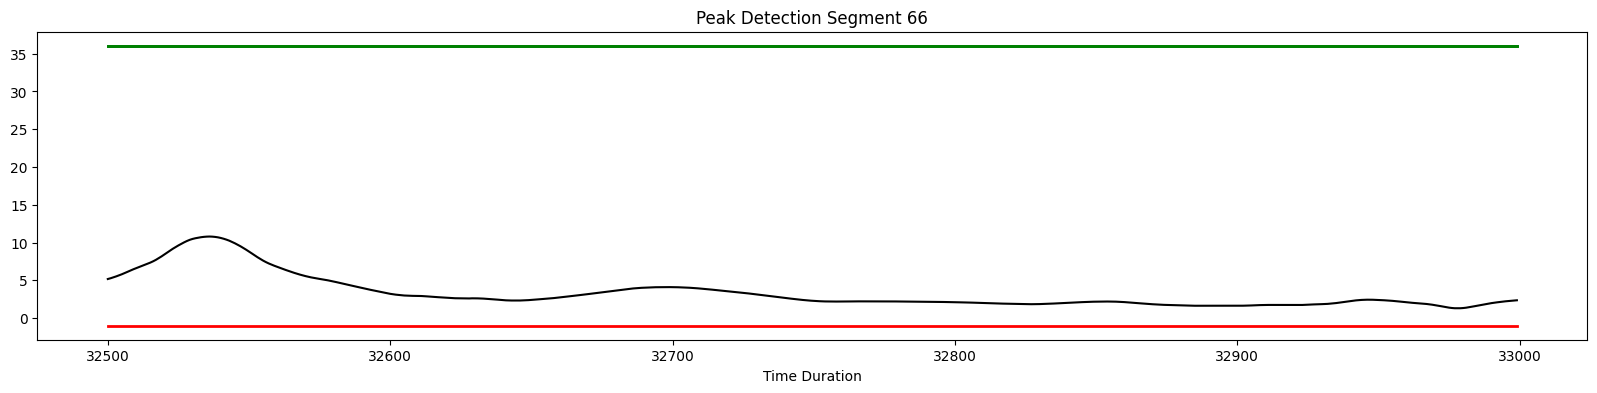

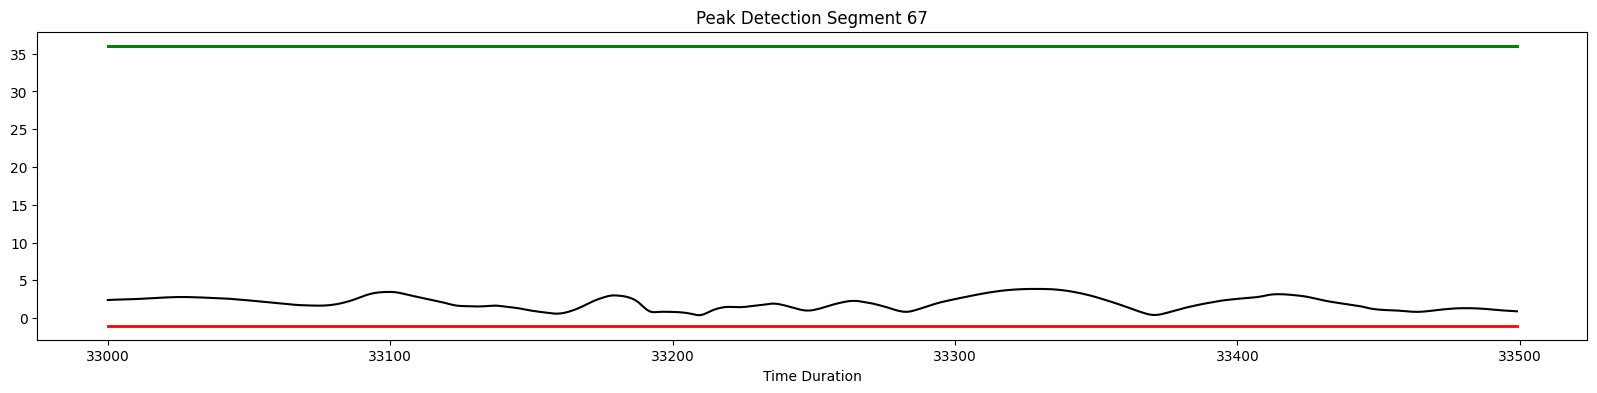

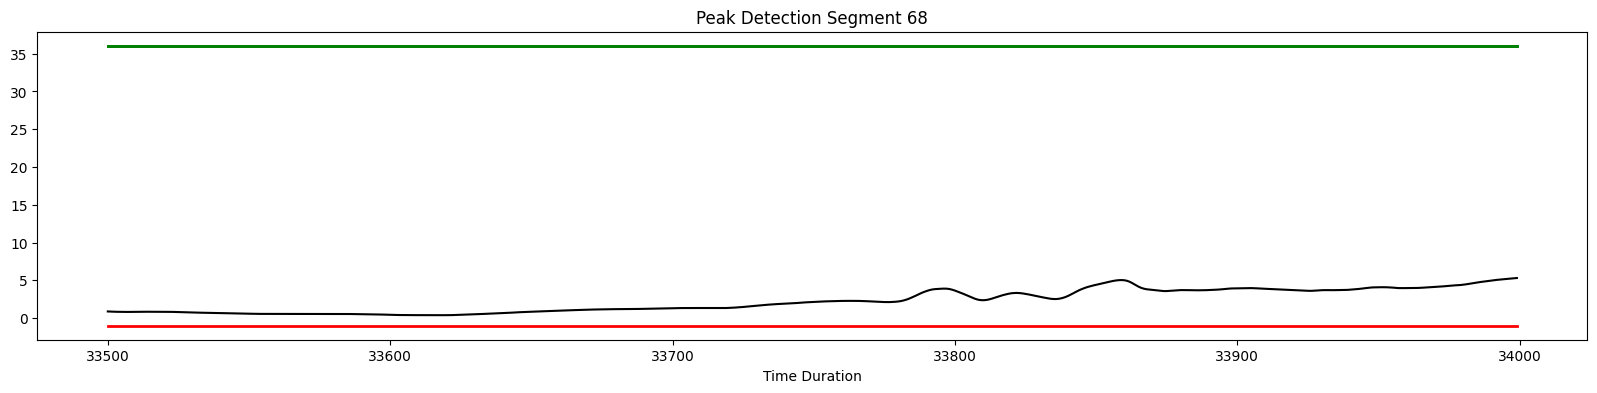

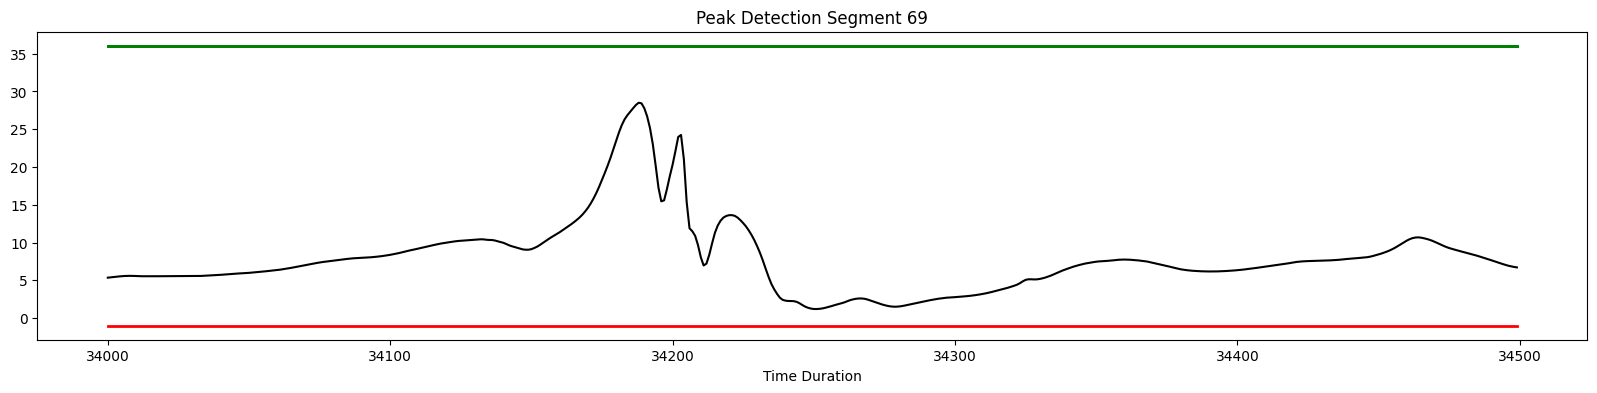

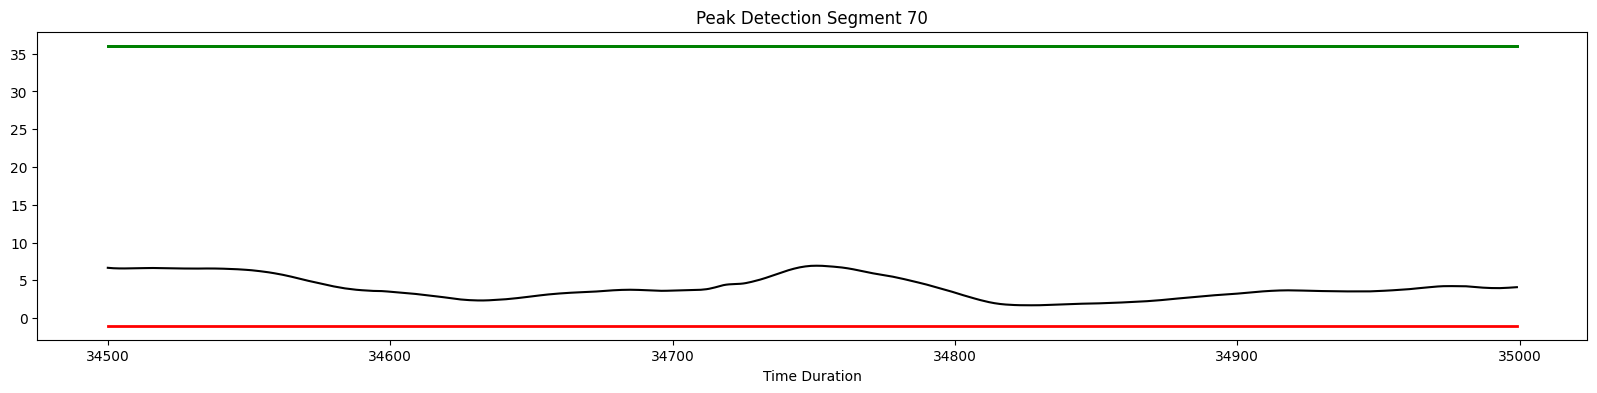

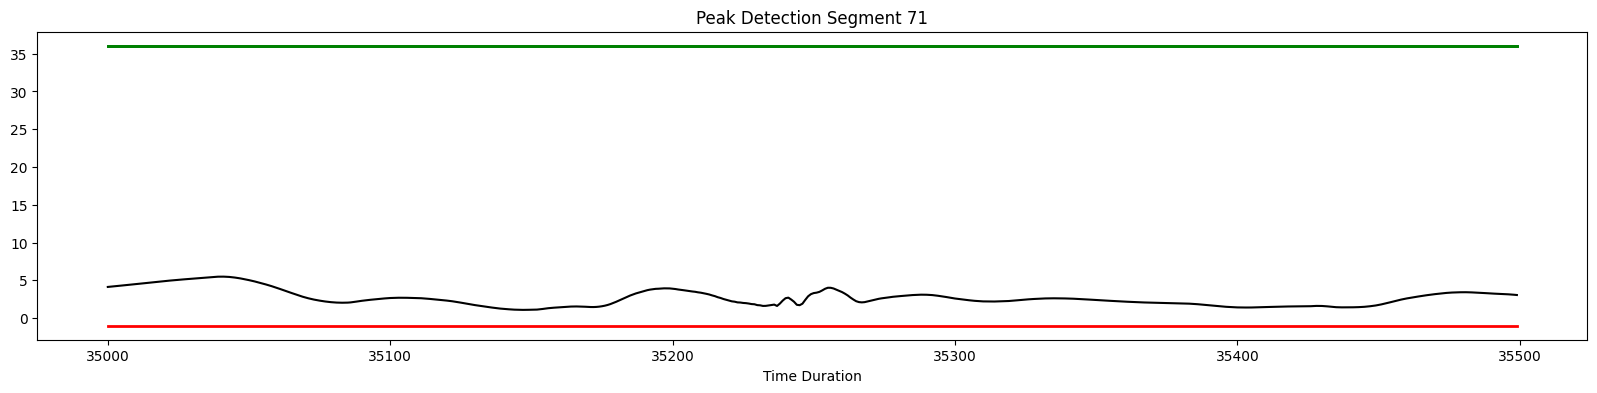

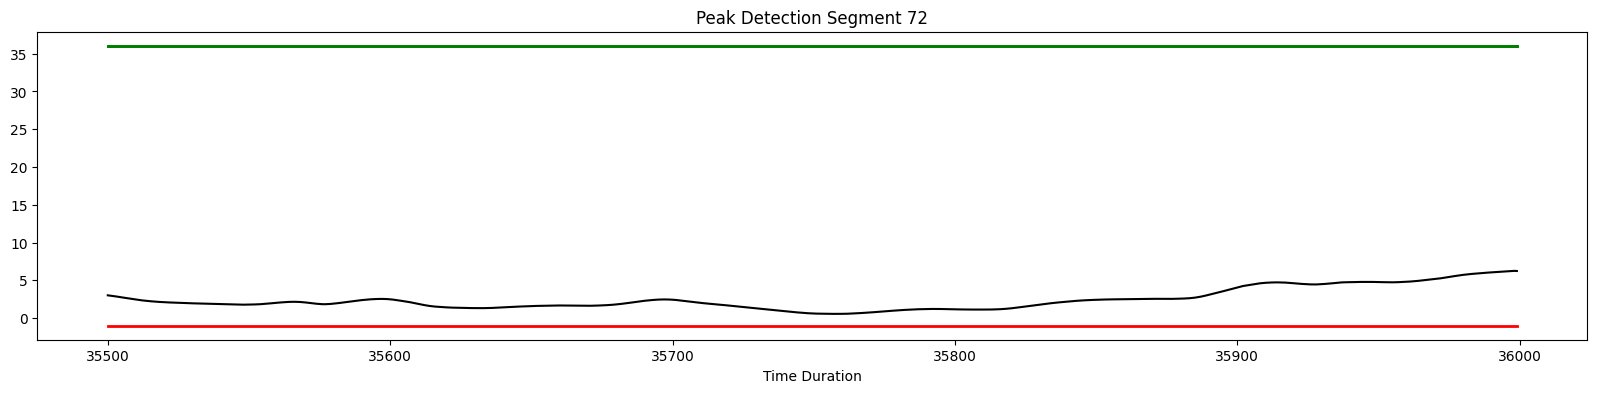

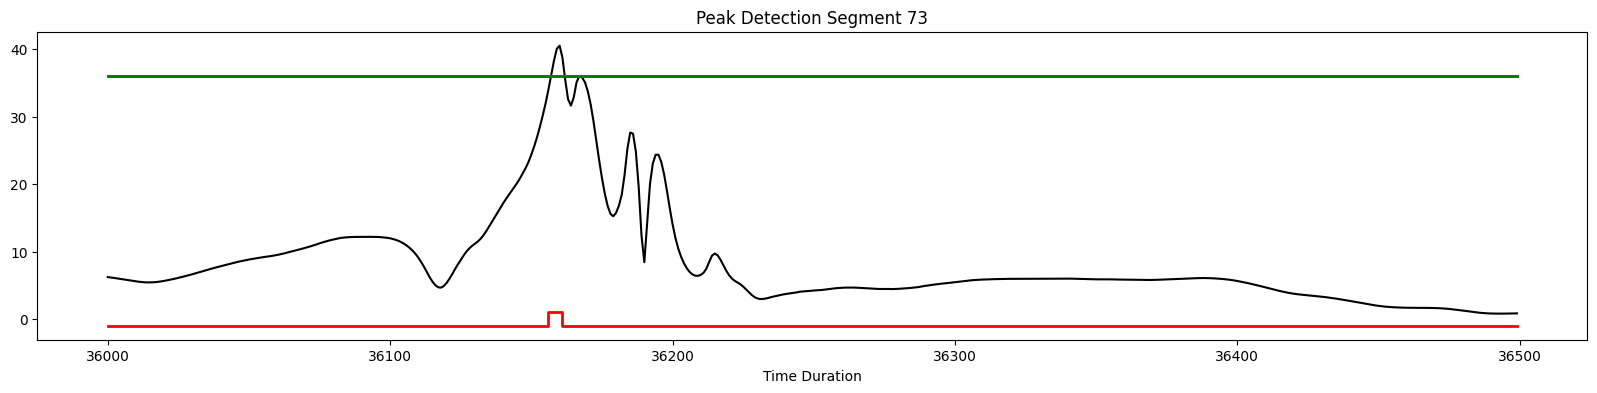

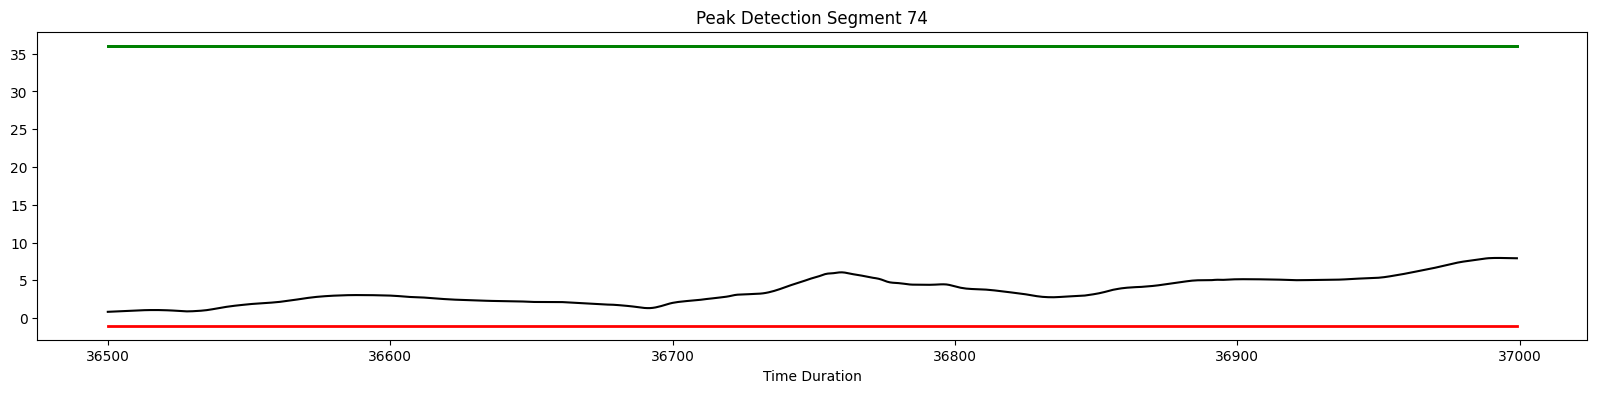

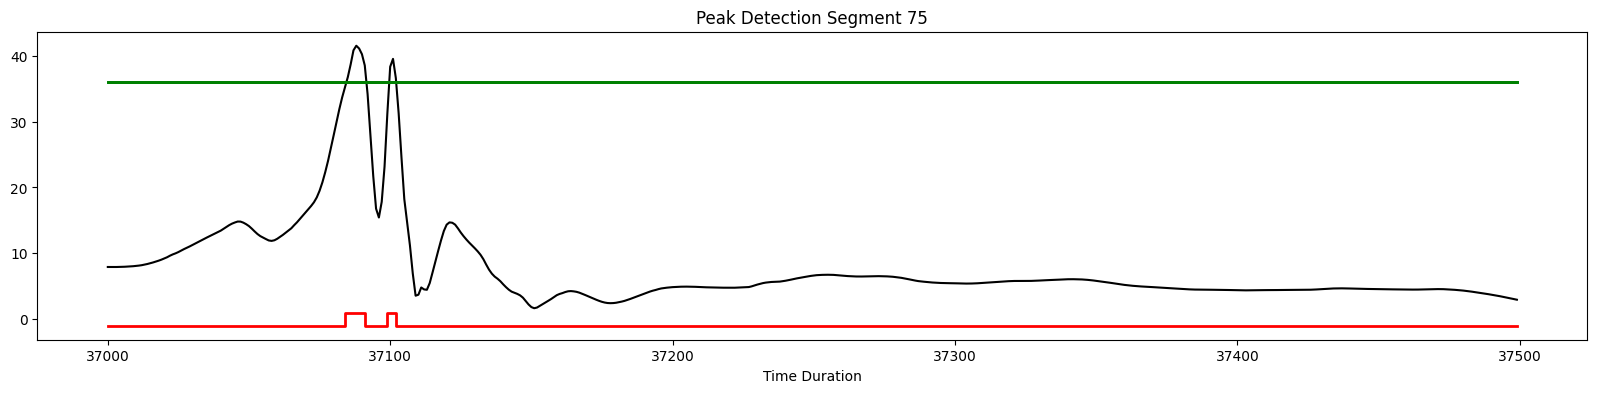

In [ ]:
# Sample data (replace this with your actual data)
y = np.array(a_mag)

# Settings: lag = 15, threshold = 2.5, influence = 0
lag = 15
threshold = 2.5
influence = 0

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result in segments of 100 data points
segment_size = 500
total_segments = len(y) // segment_size

for i in range(total_segments):
    start_idx = i * segment_size
    end_idx = start_idx + segment_size

    fig, ax = plt.subplots(1, 1, figsize=(20, 4))

    # Plot original data
    ax.plot(np.arange(start_idx, end_idx), y[start_idx:end_idx], color='black')

    # Plot average filter and threshold lines
    ax.plot(np.arange(start_idx, end_idx), result["avgFilter"][start_idx:end_idx], color="cyan", lw=2)
    ax.plot(np.arange(start_idx, end_idx), result["avgFilter"][start_idx:end_idx] + threshold * result["stdFilter"][start_idx:end_idx], color="green", lw=2)
    ax.plot(np.arange(start_idx, end_idx), result["avgFilter"][start_idx:end_idx] - threshold * result["stdFilter"][start_idx:end_idx], color="green", lw=2)

    # Plot peak detection signal
    ax.step(np.arange(start_idx, end_idx), result["signals"][start_idx:end_idx], color="red", lw=2)

    ax.set_xlabel('Time Duration')
    ax.set_title(f'Peak Detection Segment {i + 1}')
    plt.show()